In [1]:
%%html
<link rel="stylesheet" type="text/css" href="css/rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Regularization

- *Correlations in linear regression*
- Ridge regularization
- Lasso regularization
- Elastic Net regularization
- Tuning the regularization hyperparameter

### Learning goals - *Correlations in linear regression*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate how correlations can influence a linear regression model.</div> | `LinearRegression` |

In [3]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('data/diabetes.csv')
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,DIS
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [4]:
names = list(df.columns.values)
features = names[:-1]
target = names[-1]

print(features)
print(target)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
DIS


In [5]:
X = df.loc[:,features].to_numpy()
y = df[target].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [6]:
def standardize(data):
    return (data - X.mean(axis=0)) / X.std(axis=0)

In [7]:
Xs = standardize(X)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xs, y);

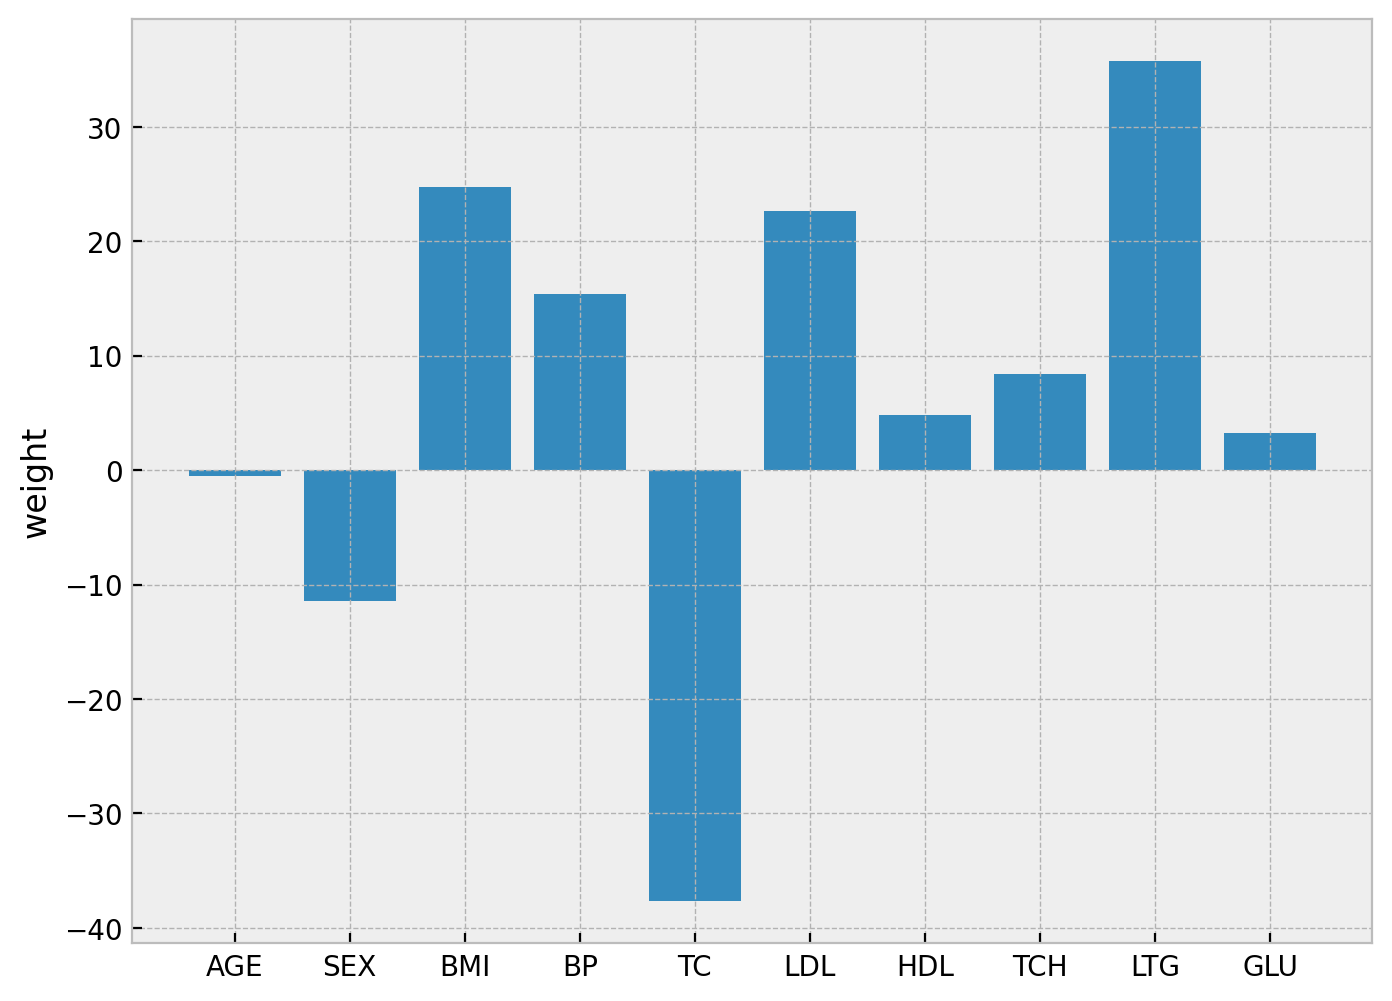

In [9]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel('weight');

What if we try training the model on either the first or last 100 patients only?

In [10]:
model1 = LinearRegression()
model1.fit(Xs[:100], y[:100])

model2 = LinearRegression()
model2.fit(Xs[-100:], y[-100:]);

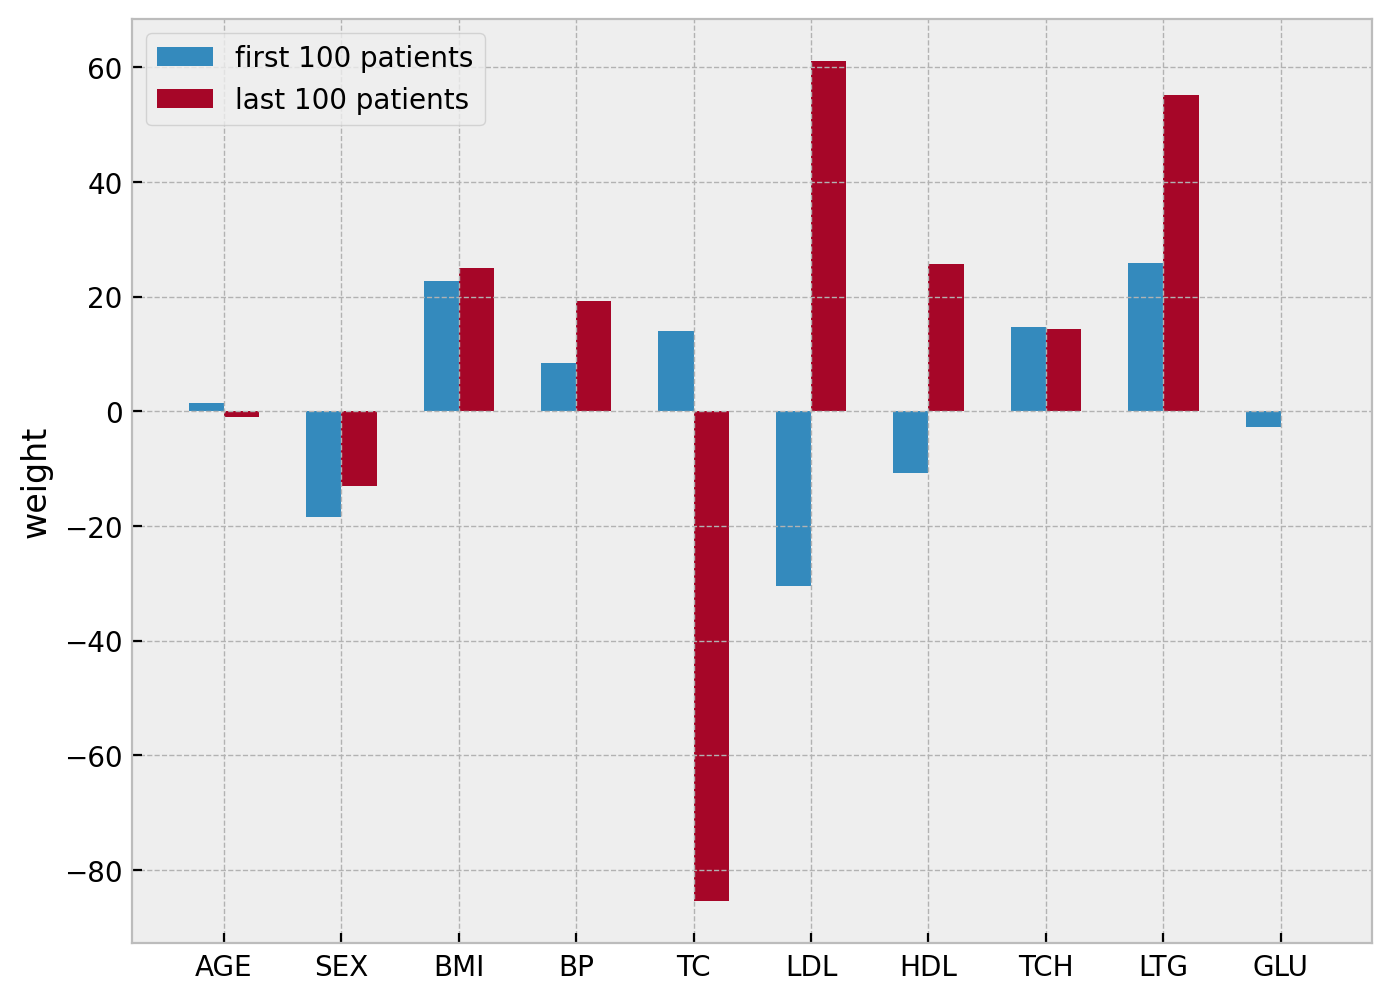

In [11]:
# first vs last 100 patients
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.legend();

Notice that TC and LDL are highly correlated.

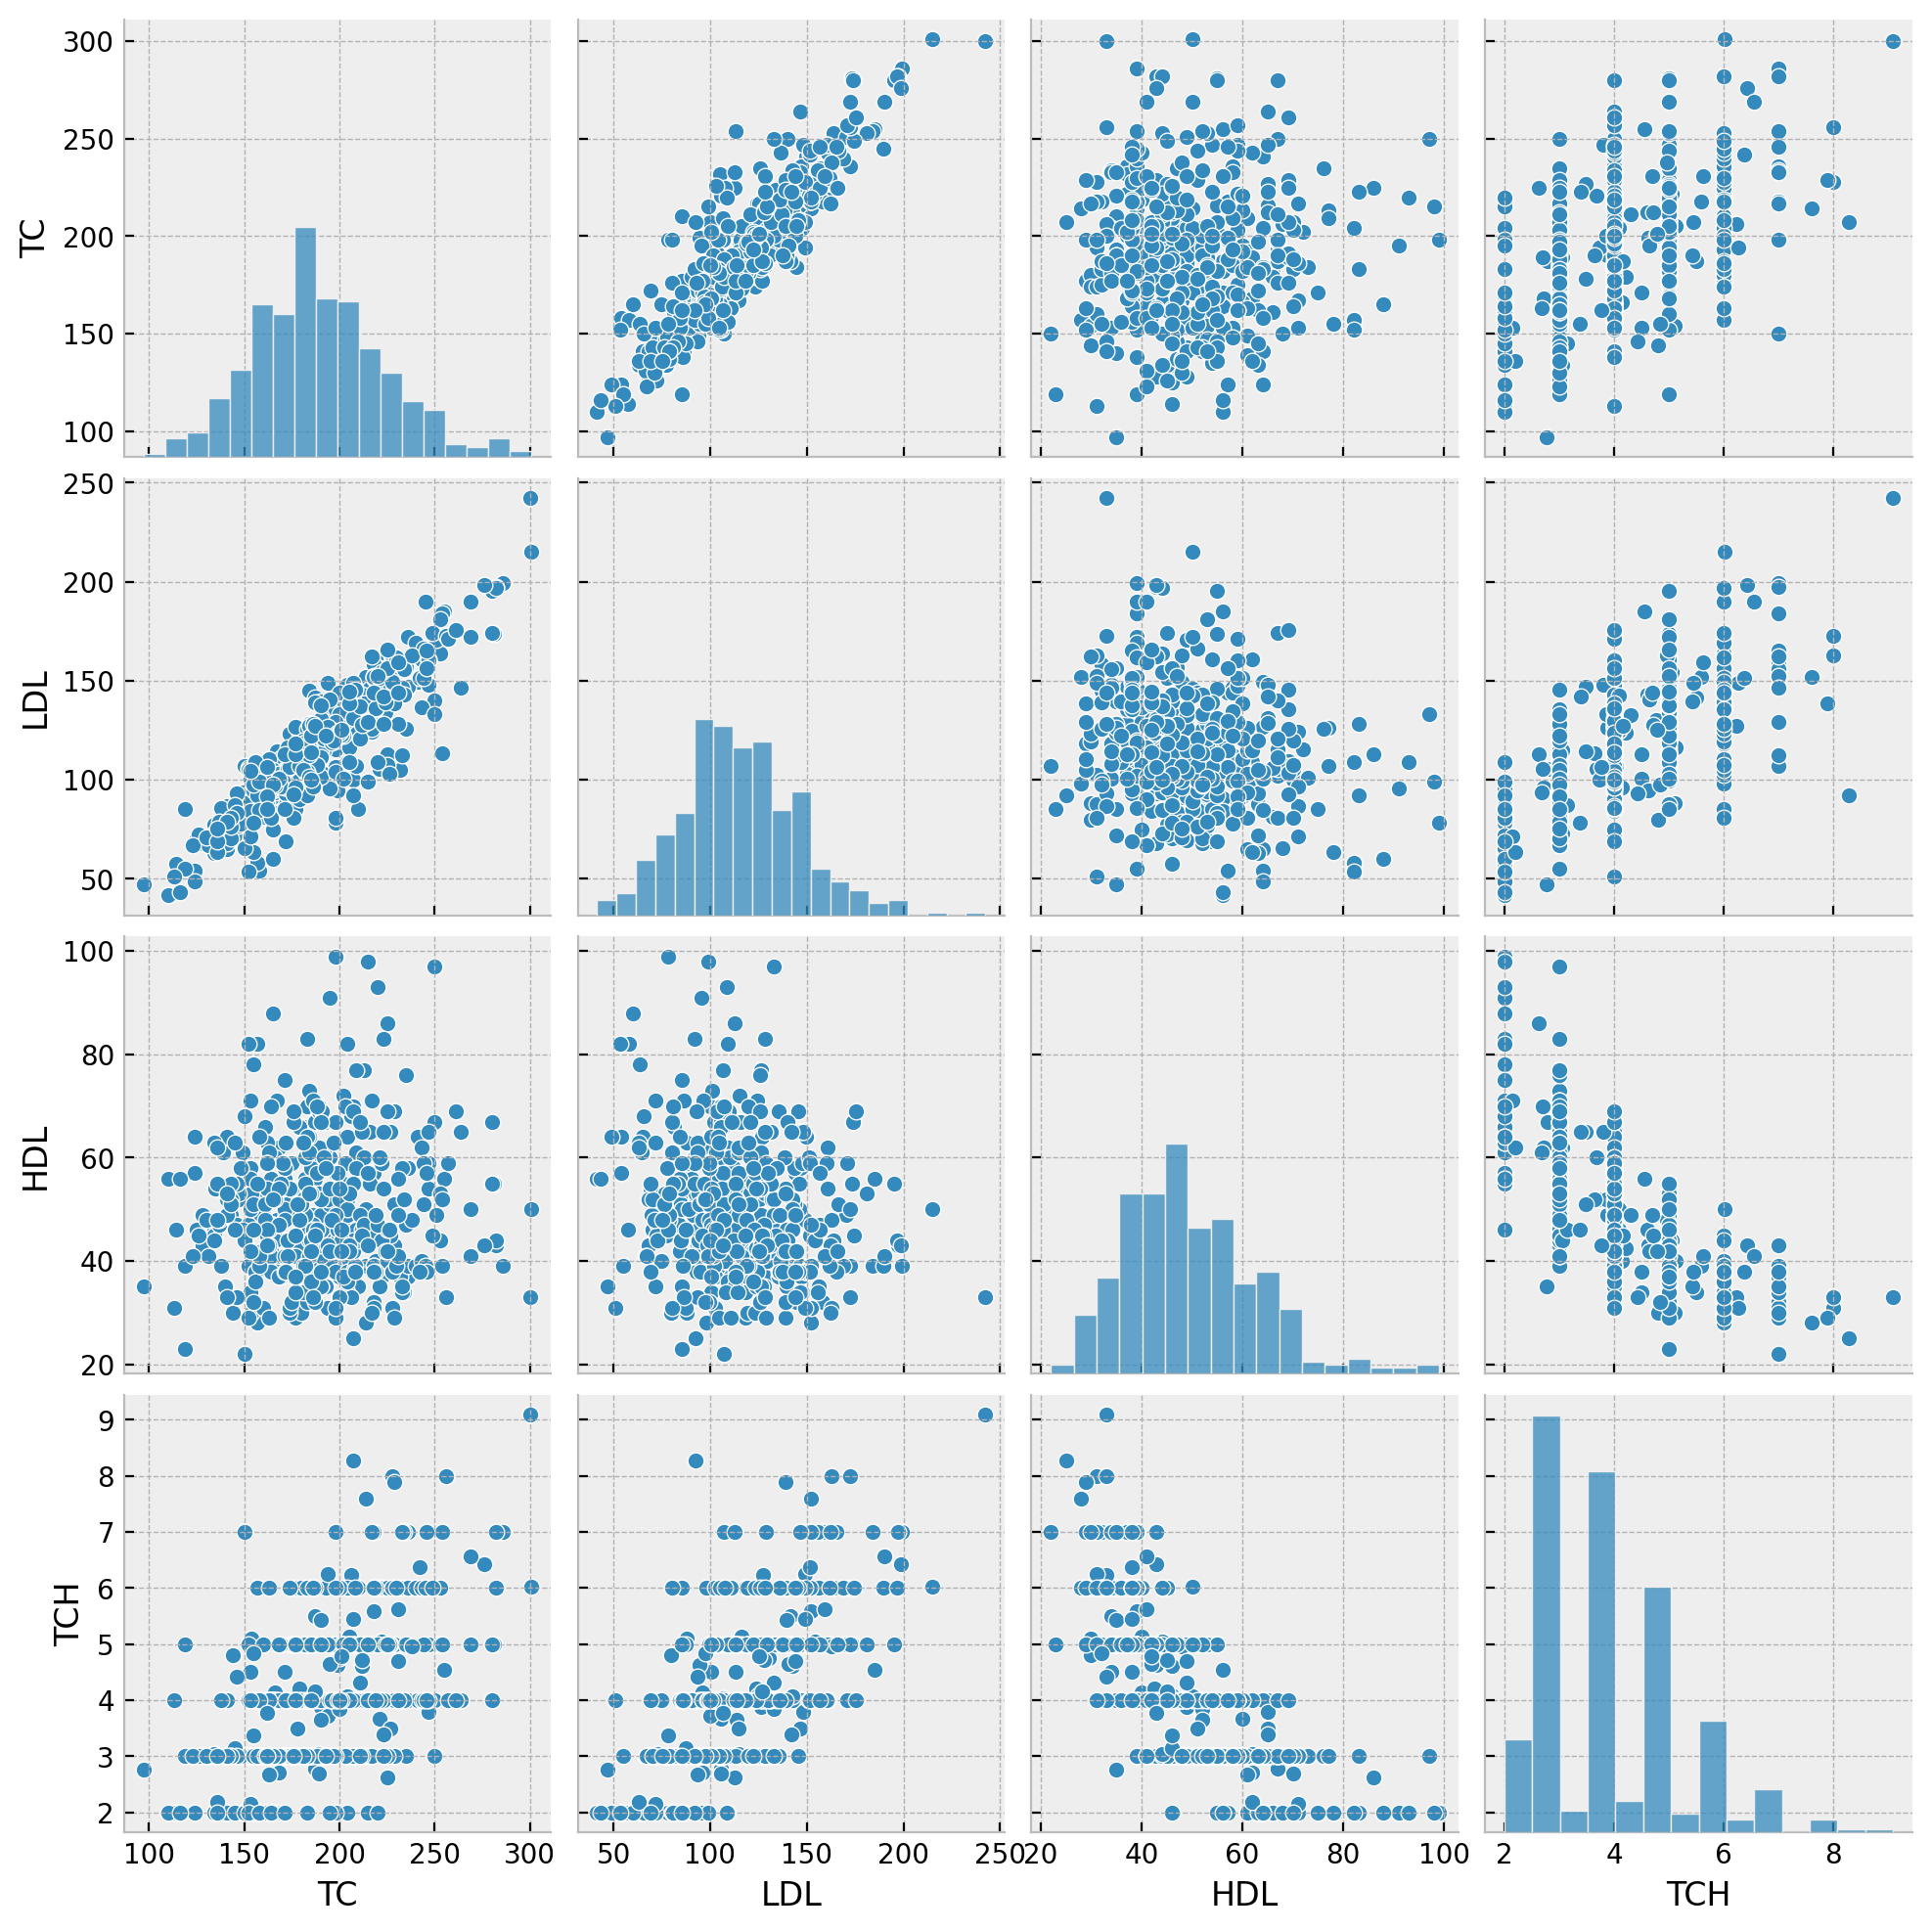

In [12]:
import seaborn as sns

sns.pairplot(df[['TC', 'LDL', 'HDL', 'TCH']]);

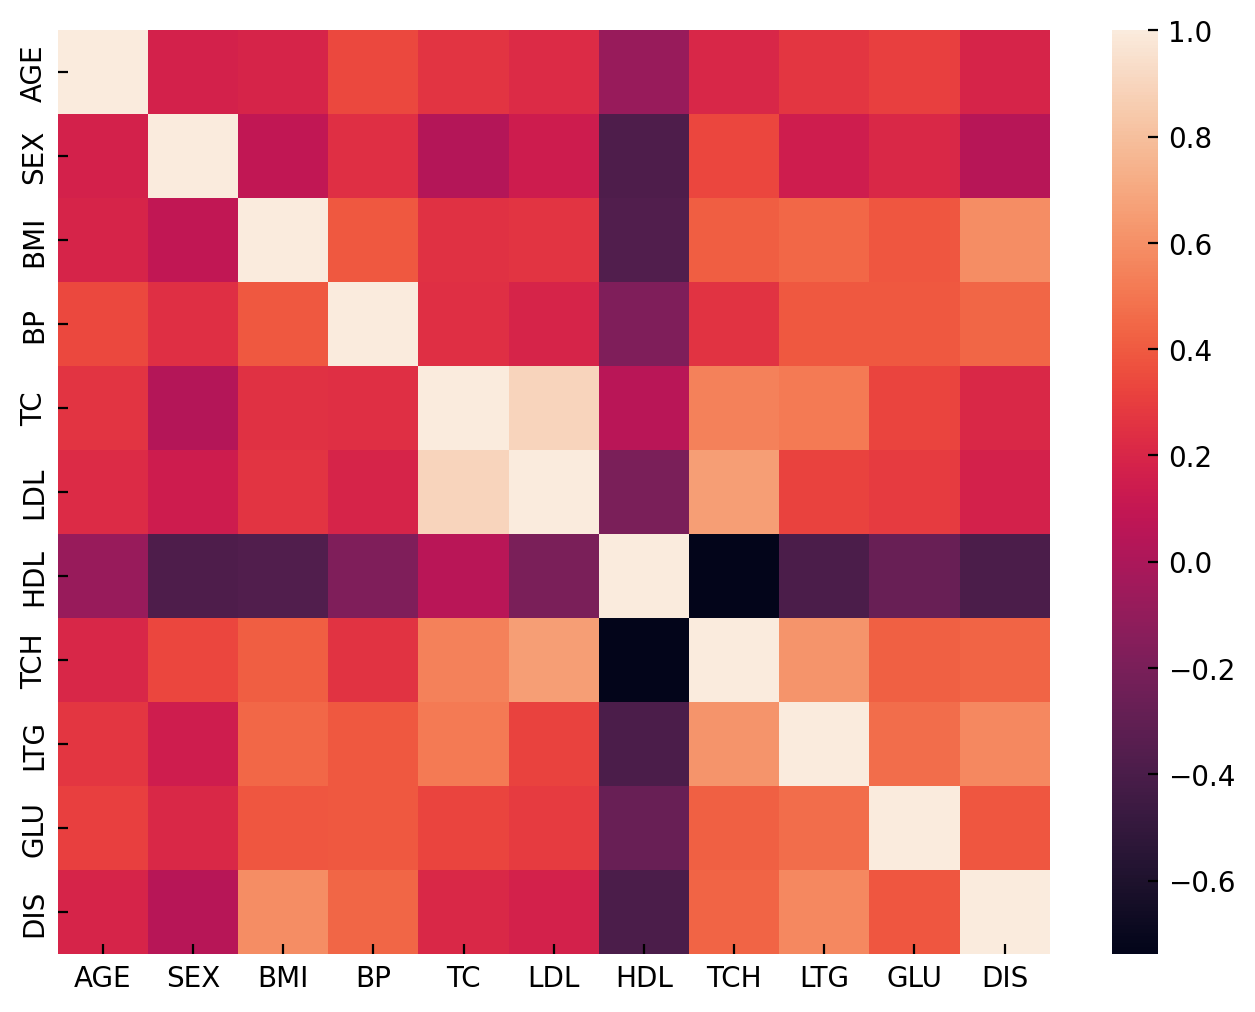

In [13]:
sns.heatmap(df.corr());

Let's train the model on either the first or last 100 patients, but exclude TC from the list of predictors.

In [14]:
# convert to numpy array so we can use logical mask indexing
features = np.array(features)
features

array(['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU'],
      dtype='<U3')

In [15]:
not_TC = (features != "TC")
not_TC

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [16]:
Xs.shape, Xs[:,not_TC].shape

((442, 10), (442, 9))

Let's train the model on either the first or last 100 patients, but exclude TC from the list of predictors.

In [17]:
model1_no_TC = LinearRegression()
model1_no_TC.fit(Xs[:100,not_TC], y[:100])

model2_no_TC = LinearRegression()
model2_no_TC.fit(Xs[-100:,not_TC], y[-100:]);

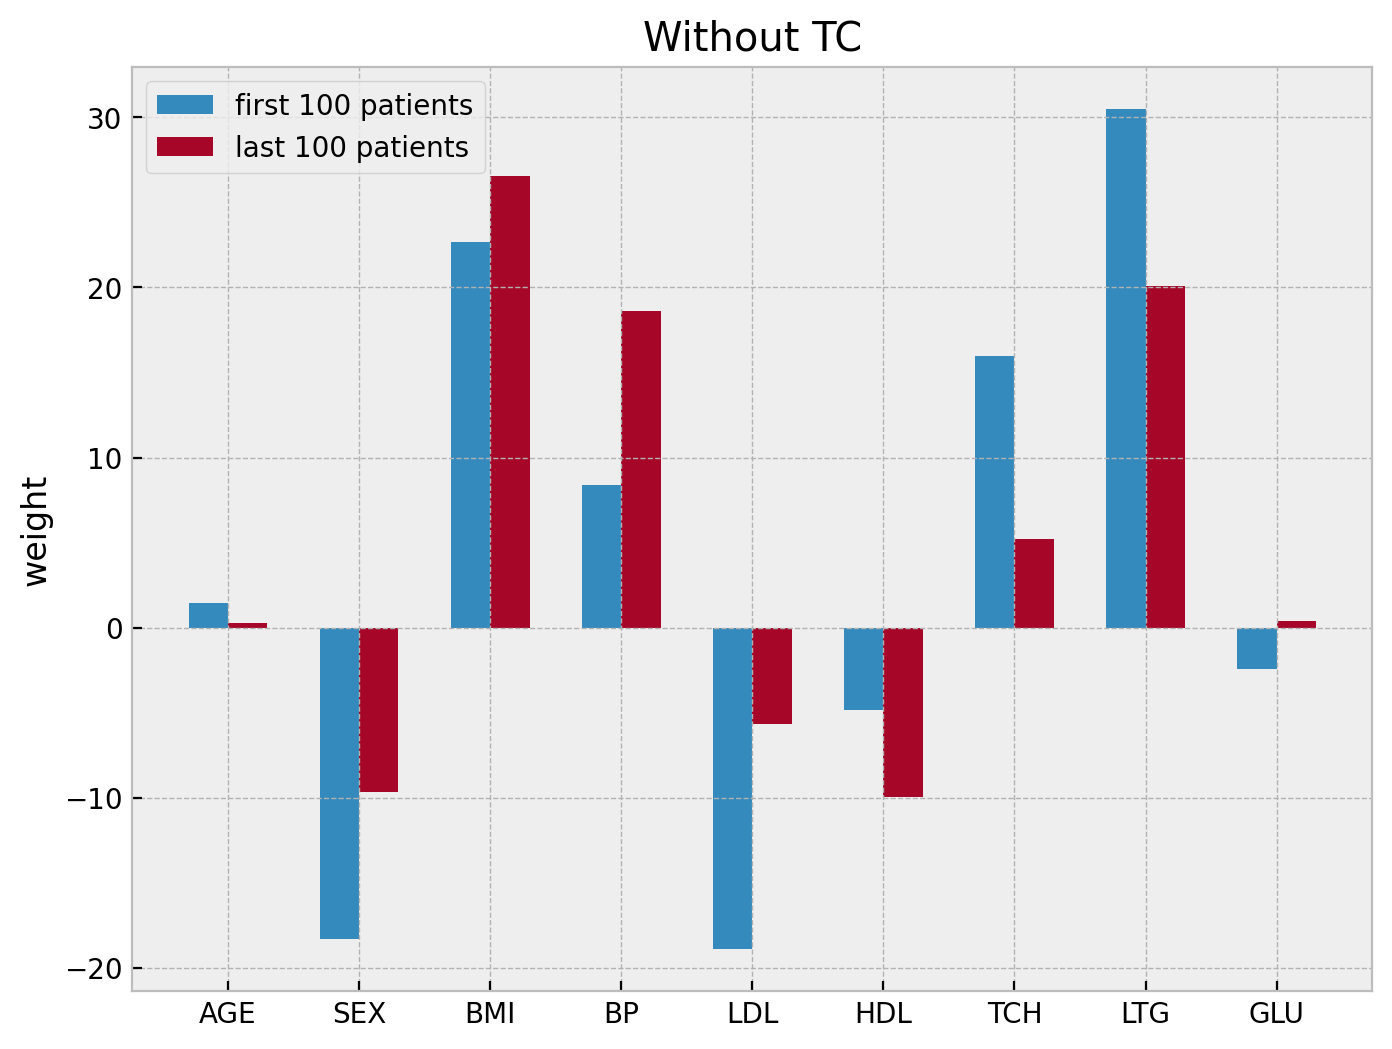

In [18]:
# first vs last 100 patients without TC
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend();

What about excluding LDL instead of TC?

In [19]:
not_LDL = (features != "LDL")

model1_no_LDL = LinearRegression()
model1_no_LDL.fit(Xs[:100,not_LDL], y[:100])

model2_no_LDL = LinearRegression()
model2_no_LDL.fit(Xs[-100:,not_LDL], y[-100:]);

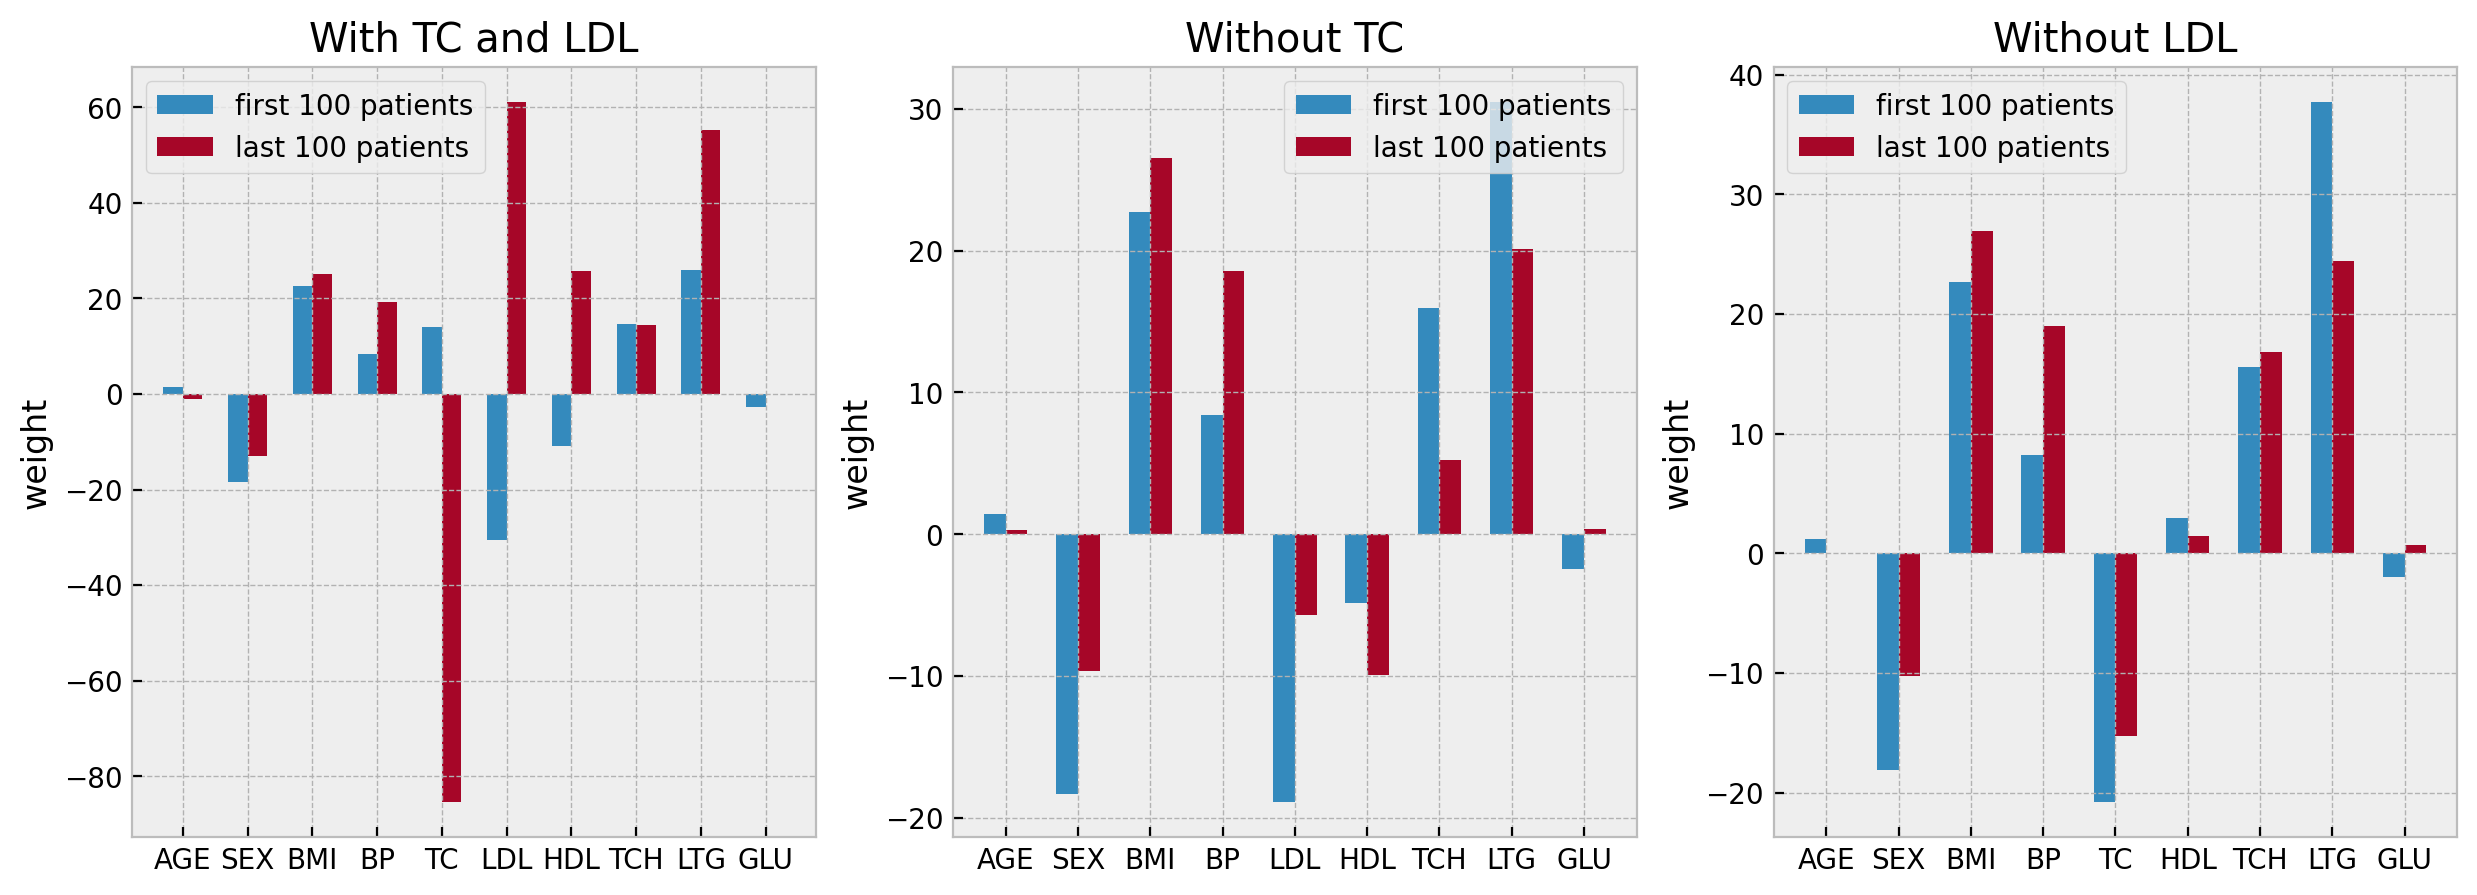

In [20]:
# first vs last 100 patients with and without TC or LDL
plt.figure(figsize=[15,5])
plt.subplot(131)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('With TC and LDL')
plt.legend()

plt.subplot(132)
n = len(model1_no_TC.coef_)
plt.bar(np.arange(n)-0.15, model1_no_TC.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_TC.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_TC])
plt.ylabel('weight')
plt.title('Without TC')
plt.legend()

plt.subplot(133)
n = len(model1_no_LDL.coef_)
plt.bar(np.arange(n)-0.15, model1_no_LDL.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2_no_LDL.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features[not_LDL])
plt.ylabel('weight')
plt.title('Without LDL')
plt.legend();

The overall effect of both TC and LDL should have a weight of ~10-20.

So what's wrong with a model like the one for the last 100 patients that includes both TC and LDL?

The huge opposing weights will lead to high variability in the model's predictions based on random differences in patient TC and LDL measurements.

Thus, the model may not generalize well when making predictions for new patients.

### Learning goals - *Correlations in linear regression*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will appreciate how correlations can influence a linear regression model.</div> | `LinearRegression` |

# Regularization

- Correlations in linear regression
- *Ridge regularization*
- Lasso regularization
- Elastic Net regularization
- Tuning the regularization hyperparameter

### Learning goals - *Ridge regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how regularization can prevent poorly constrained model parameters from exploding.</div> | `Ridge` |

### Linear regression

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ...$

The residuals are the difference between the data $y$ and the model prediction $\hat{y}$.

The residual sum of squared errors ($RSS$):

$RSS = \sum{{(y - \hat{y})}^2}$

A linear regression model seeks the weights ($\beta_i$) that minimize $RSS$.

### Ridge Regularization

L2 norm $= \sum_i{\beta_i^2}$

A Ridge regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\beta_i^2}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Ridge regression model with $\alpha = 10$.

In [21]:
from sklearn.linear_model import Ridge

ridge_model1 = Ridge(alpha=10)
ridge_model1.fit(Xs[:100], y[:100])

ridge_model2 = Ridge(alpha=10)
ridge_model2.fit(Xs[-100:], y[-100:]);

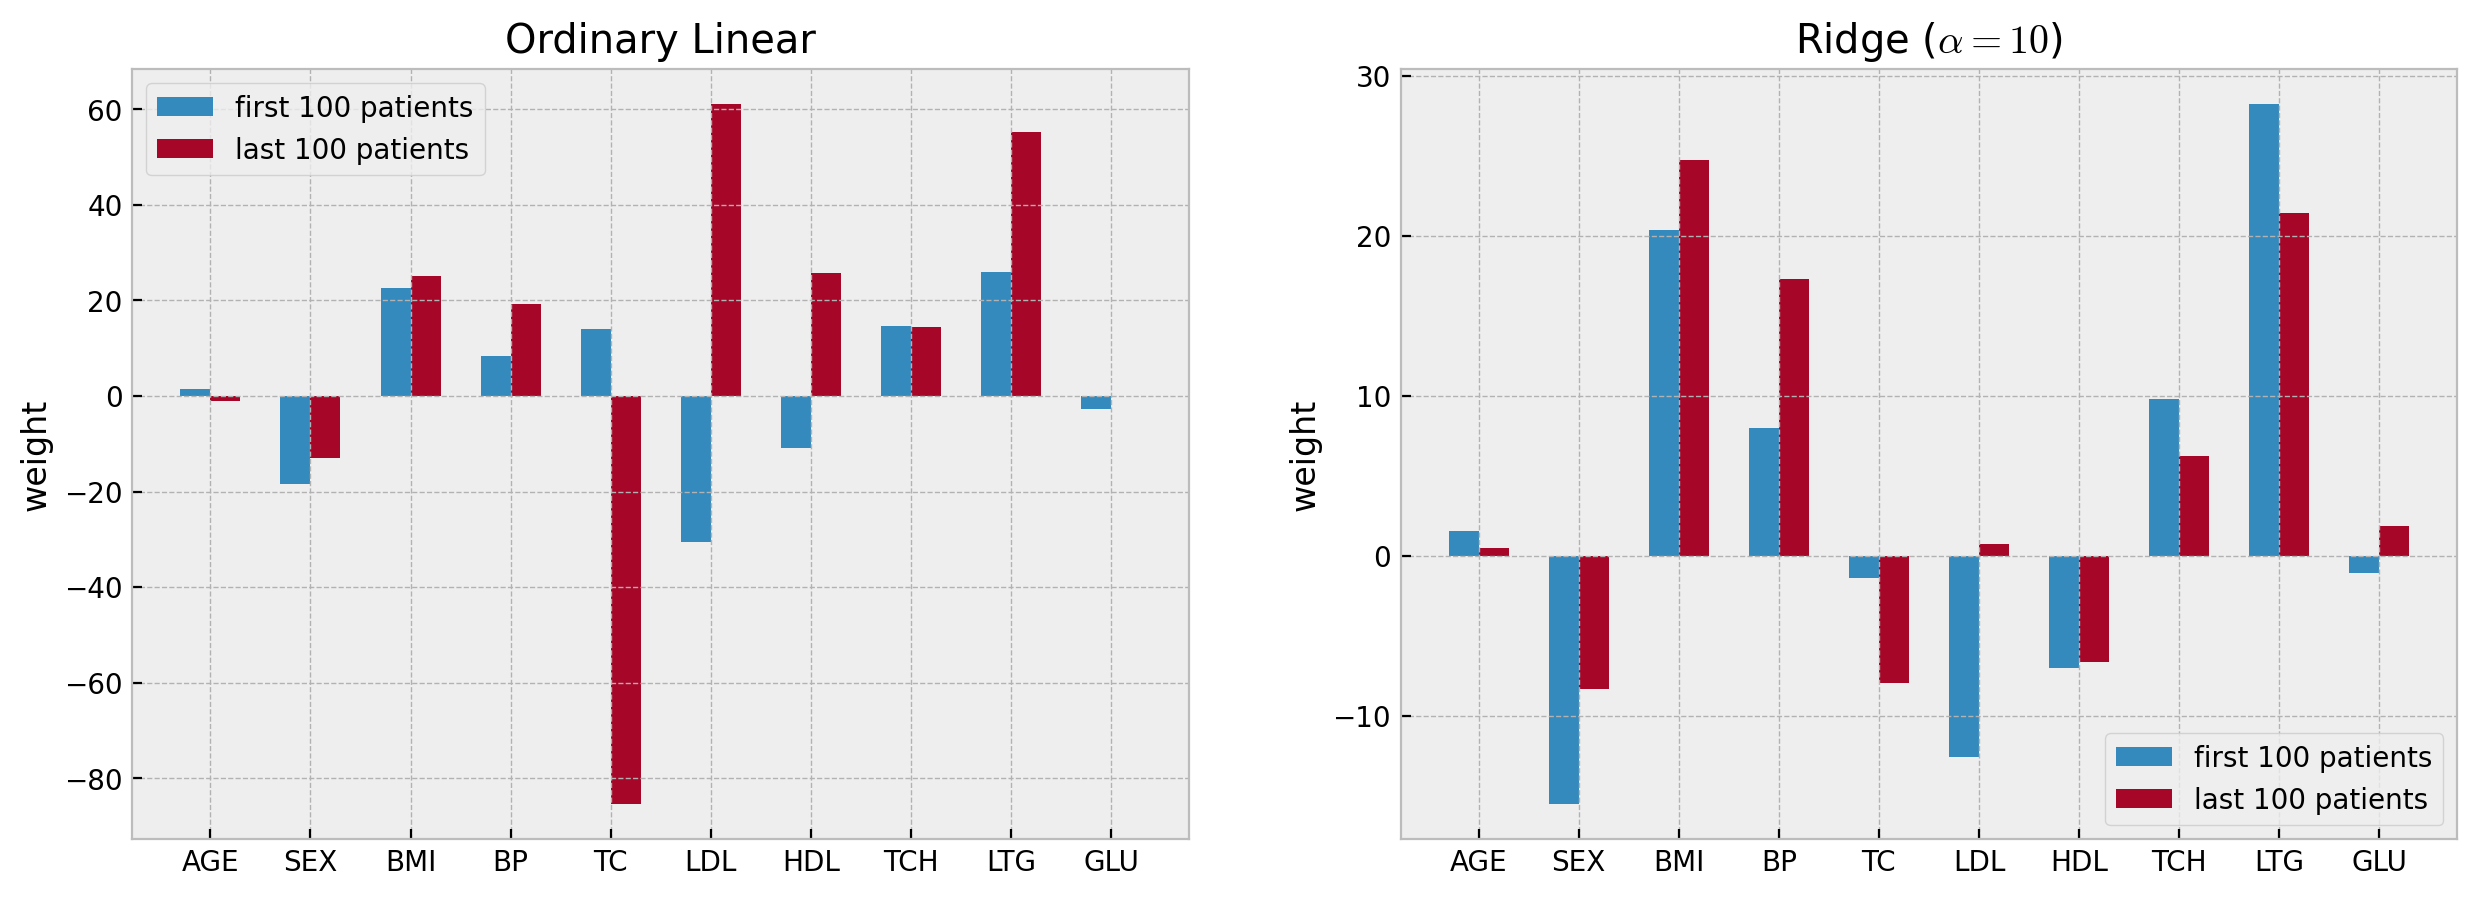

In [22]:
# first vs last 100 patients with and without Ridge model
plt.figure(figsize=[15,5])
plt.subplot(121)
n = len(model1.coef_)
plt.bar(np.arange(n)-0.15, model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Ordinary Linear')
plt.legend()

plt.subplot(122)
n = len(ridge_model1.coef_)
plt.bar(np.arange(n)-0.15, ridge_model1.coef_, width=0.3, label='first 100 patients')
plt.bar(np.arange(n)+0.15, ridge_model2.coef_, width=0.3, label='last 100 patients')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title(r'Ridge ($\alpha = 10$)')
plt.legend();

Let's compare $\alpha = 1$ vs. $\alpha = 10$.

In [23]:
ols_model = LinearRegression()
ols_model.fit(Xs, y)

ridge_model_a1 = Ridge(alpha=1)
ridge_model_a1.fit(Xs, y)

ridge_model_a10 = Ridge(alpha=10)
ridge_model_a10.fit(Xs, y);

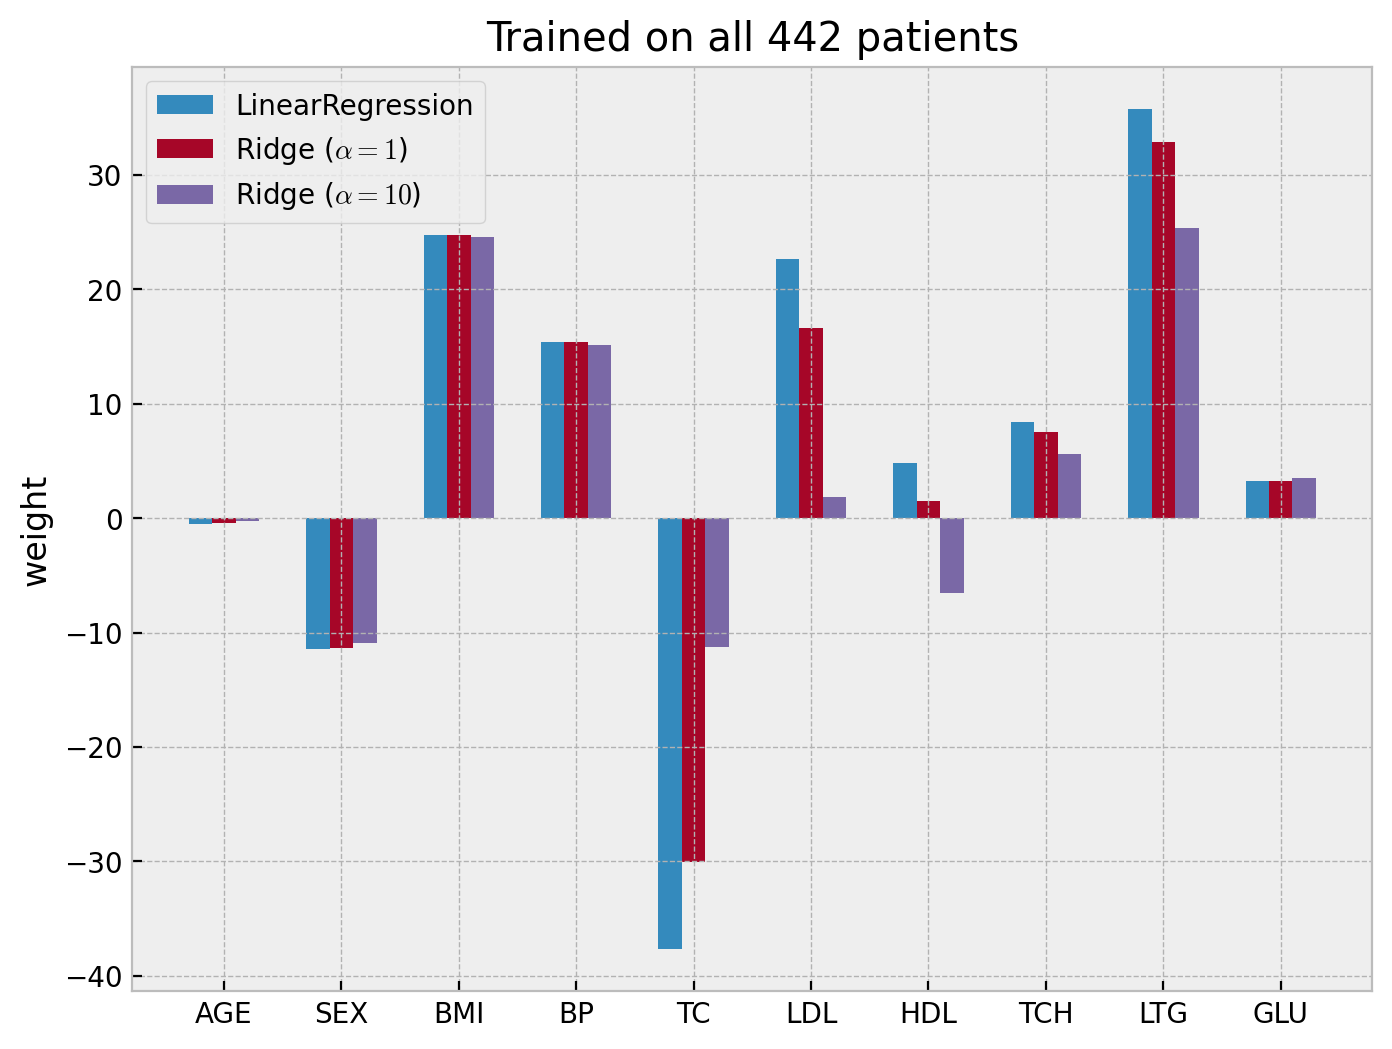

In [24]:
n = len(ols_model.coef_)
plt.bar(np.arange(n)-0.2, ols_model.coef_, width=0.2, label='LinearRegression')
plt.bar(np.arange(n)+0.0, ridge_model_a1.coef_, width=0.2, label=r'Ridge ($\alpha = 1$)')
plt.bar(np.arange(n)+0.2, ridge_model_a10.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Learning goals - *Ridge regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how regularization can prevent poorly constrained model parameters from exploding.</div> | `Ridge` |

# Regularization

- Correlations in linear regression
- Ridge regularization
- *Lasso regularization*
- Elastic Net regularization
- Tuning the regularization hyperparameter

### Learning goals - *Lasso regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how regularization can identify model parameters with little to no impact.</div> | `Lasso` |

### Lasso Regularization

L1 norm $= \sum_i{\left|\beta_i\right|}$

A Lasso regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha \sum_i{\left|\beta_i\right|}$.

What effect will this have on the model weights ($\beta_i$)?

Let's try a Lasso regression model with $\alpha = 1$.

In [25]:
from sklearn.linear_model import Lasso

lasso_model_a1 = Lasso(alpha=1)
lasso_model_a1.fit(Xs, y);

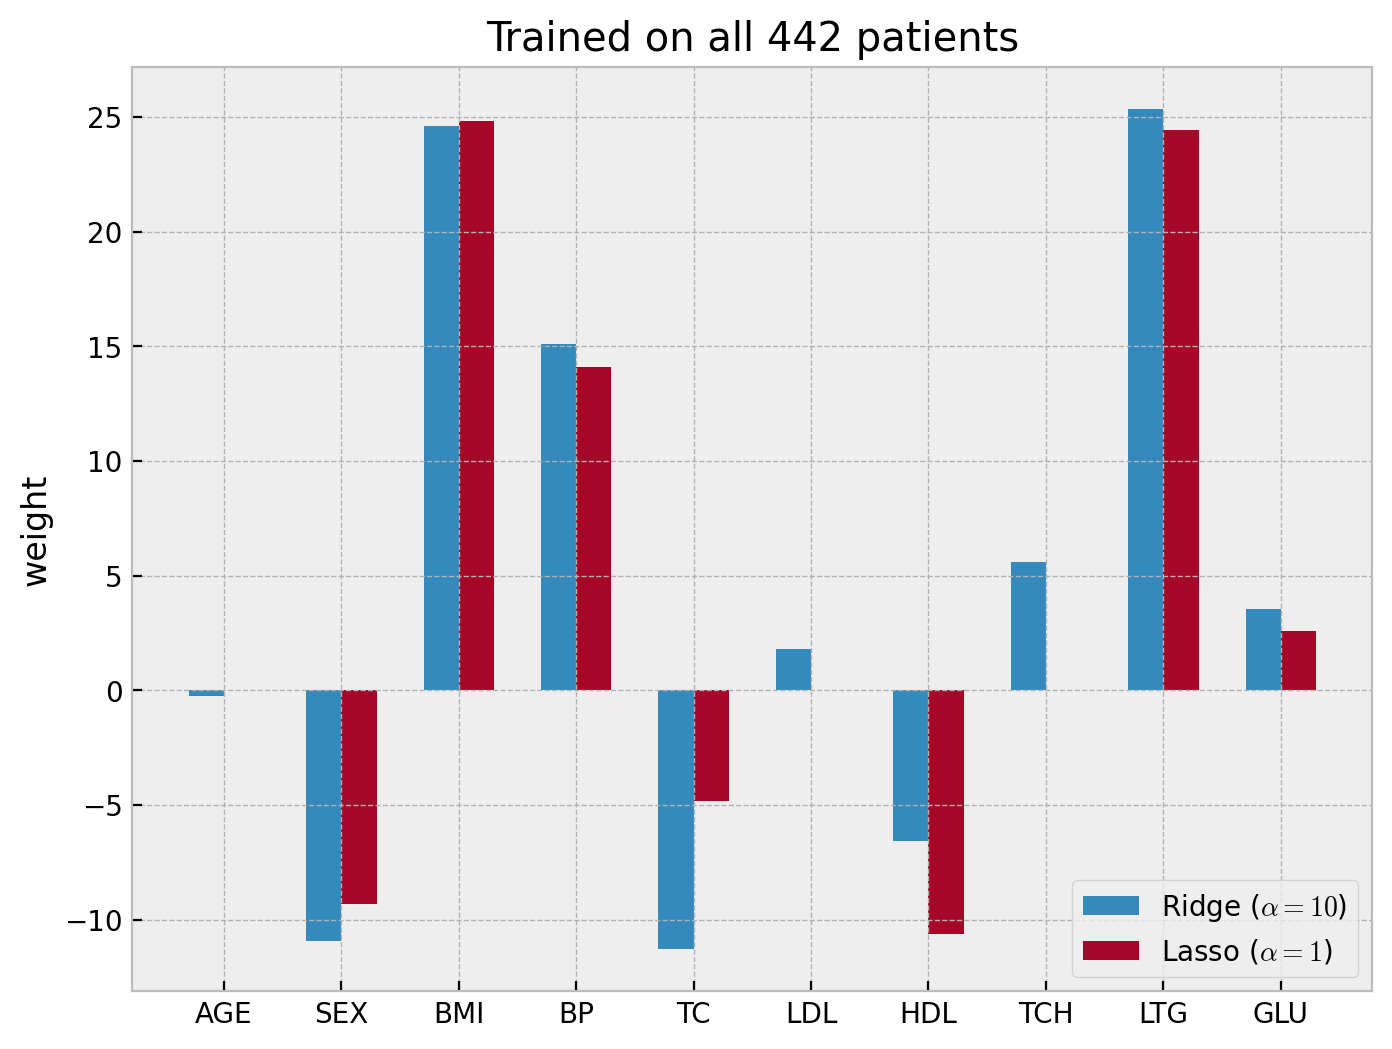

In [26]:
n = len(ridge_model_a10.coef_)
plt.bar(np.arange(n)-0.15, ridge_model_a10.coef_, width=0.3, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

Notice that some of the coefficients are zero!

In [27]:
lasso_model_a1.coef_

array([ -0.        ,  -9.31941253,  24.83127631,  14.08870568,
        -4.83892808,  -0.        , -10.62279919,   0.        ,
        24.42081057,   2.56212987])

What about for $\alpha = 10$?

In [28]:
lasso_model_a10 = Lasso(alpha=10)
lasso_model_a10.fit(Xs, y)

lasso_model_a10.coef_

array([ 0.        , -0.        , 22.60037484,  6.80123653, -0.        ,
       -0.        , -3.08803938,  0.        , 19.58593242,  0.        ])

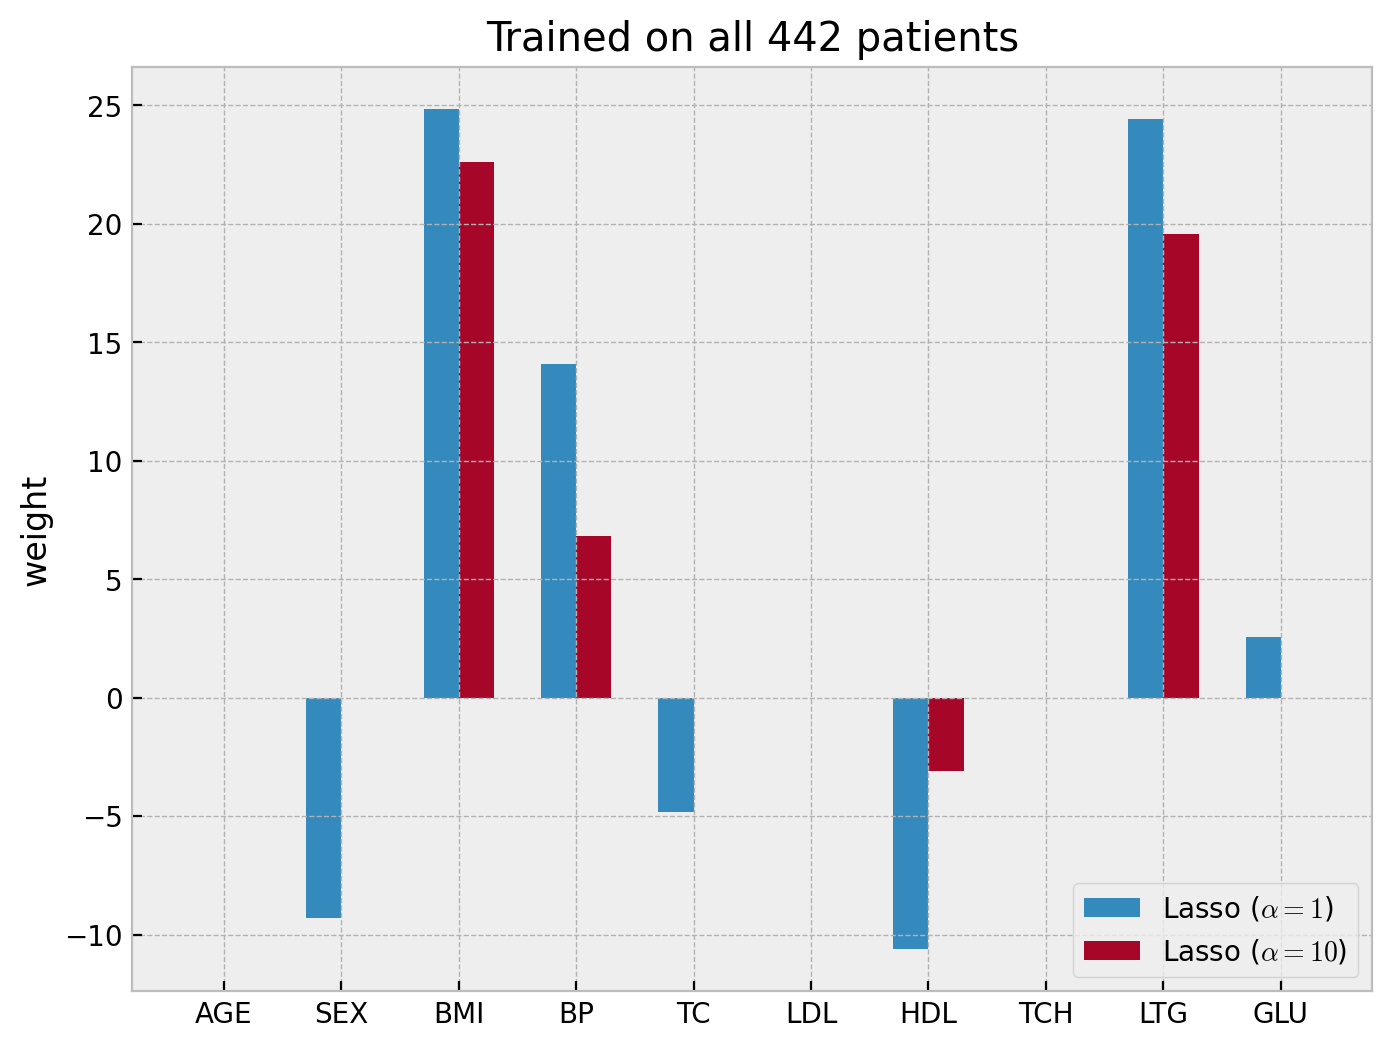

In [29]:
n = len(lasso_model_a1.coef_)
plt.bar(np.arange(n)-0.15, lasso_model_a1.coef_, width=0.3, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.15, lasso_model_a10.coef_, width=0.3, label=r'Lasso ($\alpha = 10$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

### Learning goals - *Lasso regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see how regularization can identify model parameters with little to no impact.</div> | `Lasso` |

# Regularization

- Correlations in linear regression
- Ridge regularization
- Lasso regularization
- *Elastic Net regularization*
- Tuning the regularization hyperparameter

### Learning goals - *Elastic Net regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see a graphical depiction of the behavior of the two types of regularization and their combination.</div> | `ElasticNet` |

### Elastic Net Regularization

An Elastic Net regression model seeks the weights ($\beta_i$) that minimize $RSS + \alpha_1 \sum_i{\left|\beta_i\right|} + \alpha_2 \sum_i{\beta_i^2}$.

In [30]:
from sklearn.linear_model import ElasticNet

enet_model = ElasticNet(alpha=1, l1_ratio=0.5)  # L1=0.5 (lasso), L2=0.5 (ridge)
enet_model.fit(Xs, y)

lasso_model = Lasso(alpha=1)
lasso_model.fit(Xs, y)

ridge_model = Ridge(alpha=10)
ridge_model.fit(Xs, y);

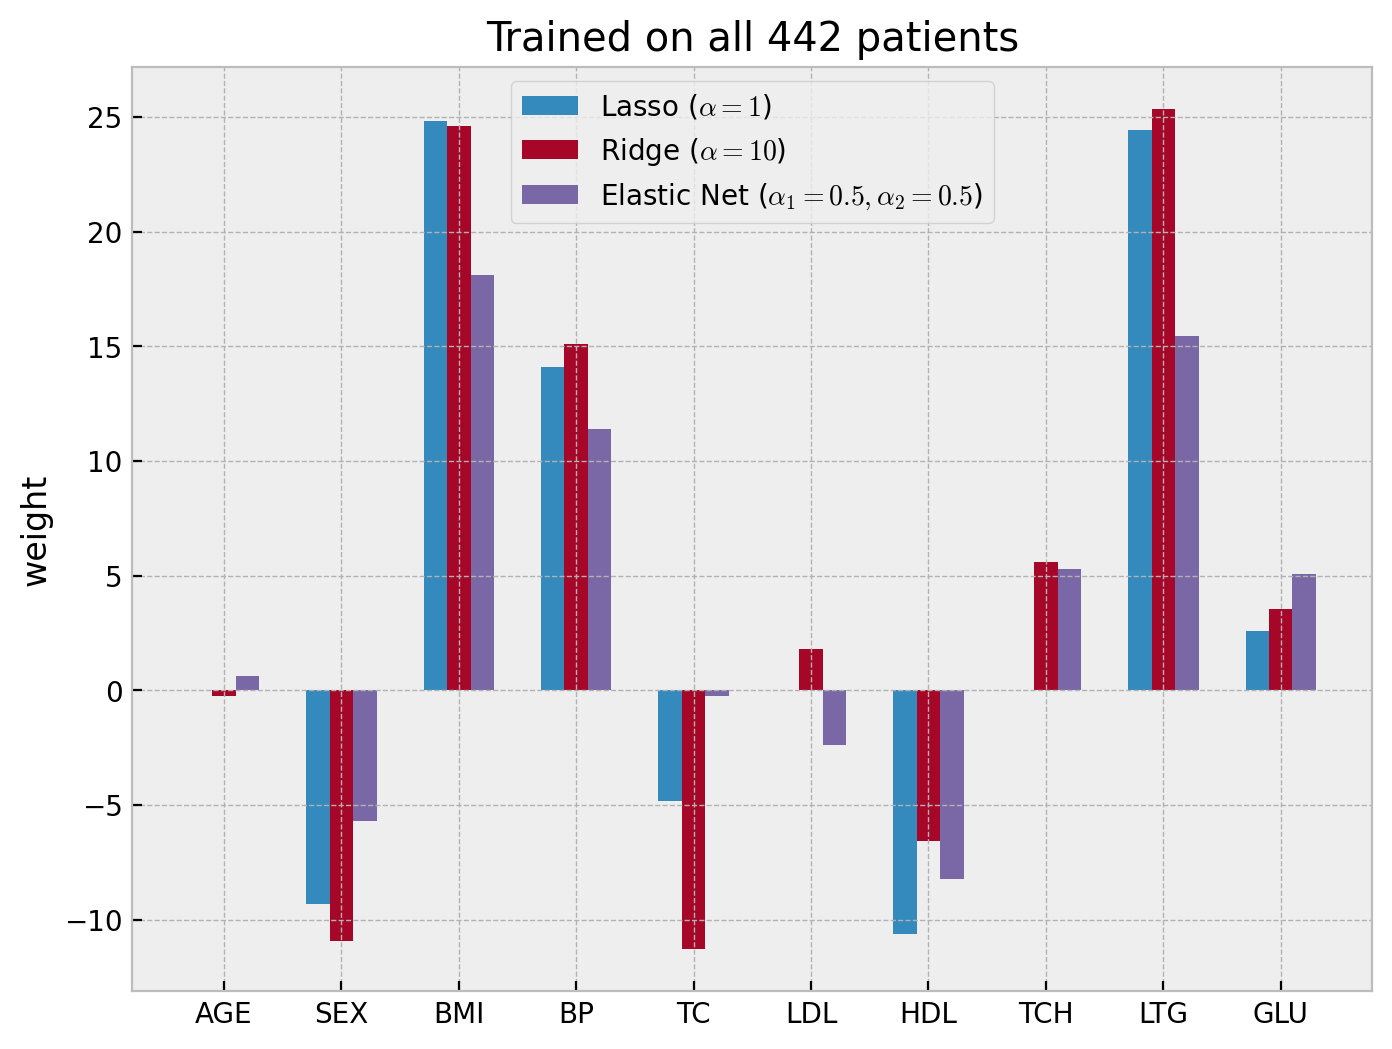

In [31]:
n = len(enet_model.coef_)
plt.bar(np.arange(n)-0.2, lasso_model.coef_, width=0.2, label=r'Lasso ($\alpha = 1$)')
plt.bar(np.arange(n)+0.0, ridge_model.coef_, width=0.2, label=r'Ridge ($\alpha = 10$)')
plt.bar(np.arange(n)+0.2, enet_model.coef_, width=0.2, label=r'Elastic Net ($\alpha_1 = 0.5, \alpha_2 = 0.5$)')
plt.xticks(range(n), features)
plt.ylabel('weight')
plt.title('Trained on all 442 patients')
plt.legend();

<img src="images/lasso-ridge-enet.png">

### Learning goals - *Elastic Net regularization*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You will see a graphical depiction of the behavior of the two types of regularization and their combination.</div> | `ElasticNet` |

# Regularization

- Correlations in linear regression
- Ridge regularization
- Lasso regularization
- Elastic Net regularization
- *Tuning the regularization hyperparameter*

### Learning goals - *Tuning the regularization hyperparameter*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You understand how to choose the regularization hyperparameter.</div> | `cross-validation` |

By choosing a particular $\alpha$, you are choosing a particular model (e.g., `Ridge(alpha=3)` vs. `Ridge(alpha=5)`).

How will you decide which regularization hyperparamter (i.e., model) is the best?

*Hint: You want a model that both fits the data well and generalizes to new data it was not trained on.*

Apply 5-fold cross validation in order to select the best Ridge model (i.e., best $\alpha$).

In [32]:
from sklearn.model_selection import cross_validate, KFold

K = 5
alphas = np.logspace(-5, 3, 50)
cv_score = np.zeros([len(alphas), K])

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    kf = KFold(n_splits=K, shuffle=True, random_state=0)
    cv_results = cross_validate(ridge, Xs, y, cv=kf, scoring='r2')
    cv_score[i] = cv_results['test_score']

Here is a slightly different way of doing the same thing as above.

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle

# cross_validate DOES NOT shuffle the data by default.
# this is so we can evaluate each model (alpha) on the exact same data partitioning
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

K = 5
alphas = np.logspace(-5, 3, 50)
cv_score = np.zeros([len(alphas), K])

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    cv_results = cross_validate(ridge, Xs_shuffled, y_shuffled, cv=K, scoring='r2')
    cv_score[i] = cv_results['test_score']

In [34]:
cv_score

array([[0.3322332 , 0.45970428, 0.53706367, 0.52165389, 0.59511988],
       [0.33223319, 0.45970429, 0.53706367, 0.52165388, 0.59511991],
       [0.33223318, 0.4597043 , 0.53706366, 0.52165386, 0.59511996],
       [0.33223317, 0.45970432, 0.53706364, 0.52165384, 0.59512004],
       [0.33223315, 0.45970436, 0.53706362, 0.52165381, 0.59512015],
       [0.33223312, 0.4597044 , 0.53706359, 0.52165376, 0.59512031],
       [0.33223307, 0.45970447, 0.53706355, 0.52165369, 0.59512054],
       [0.332233  , 0.45970457, 0.53706349, 0.52165359, 0.59512087],
       [0.33223291, 0.45970471, 0.5370634 , 0.52165345, 0.59512136],
       [0.33223276, 0.45970492, 0.53706327, 0.52165324, 0.59512208],
       [0.33223256, 0.45970523, 0.53706309, 0.52165294, 0.59512312],
       [0.33223225, 0.45970567, 0.53706281, 0.52165249, 0.59512463],
       [0.33223181, 0.45970632, 0.53706241, 0.52165185, 0.59512683],
       [0.33223117, 0.45970726, 0.53706183, 0.52165091, 0.59513004],
       [0.33223024, 0.45970864, 0.

In [35]:
cv_score_mean = cv_score.mean(axis=1)
cv_score_std = cv_score.std(axis=1)

best_index = np.argmax(cv_score_mean)
best_alpha = alphas[best_index]

best_alpha

1.6768329368110066

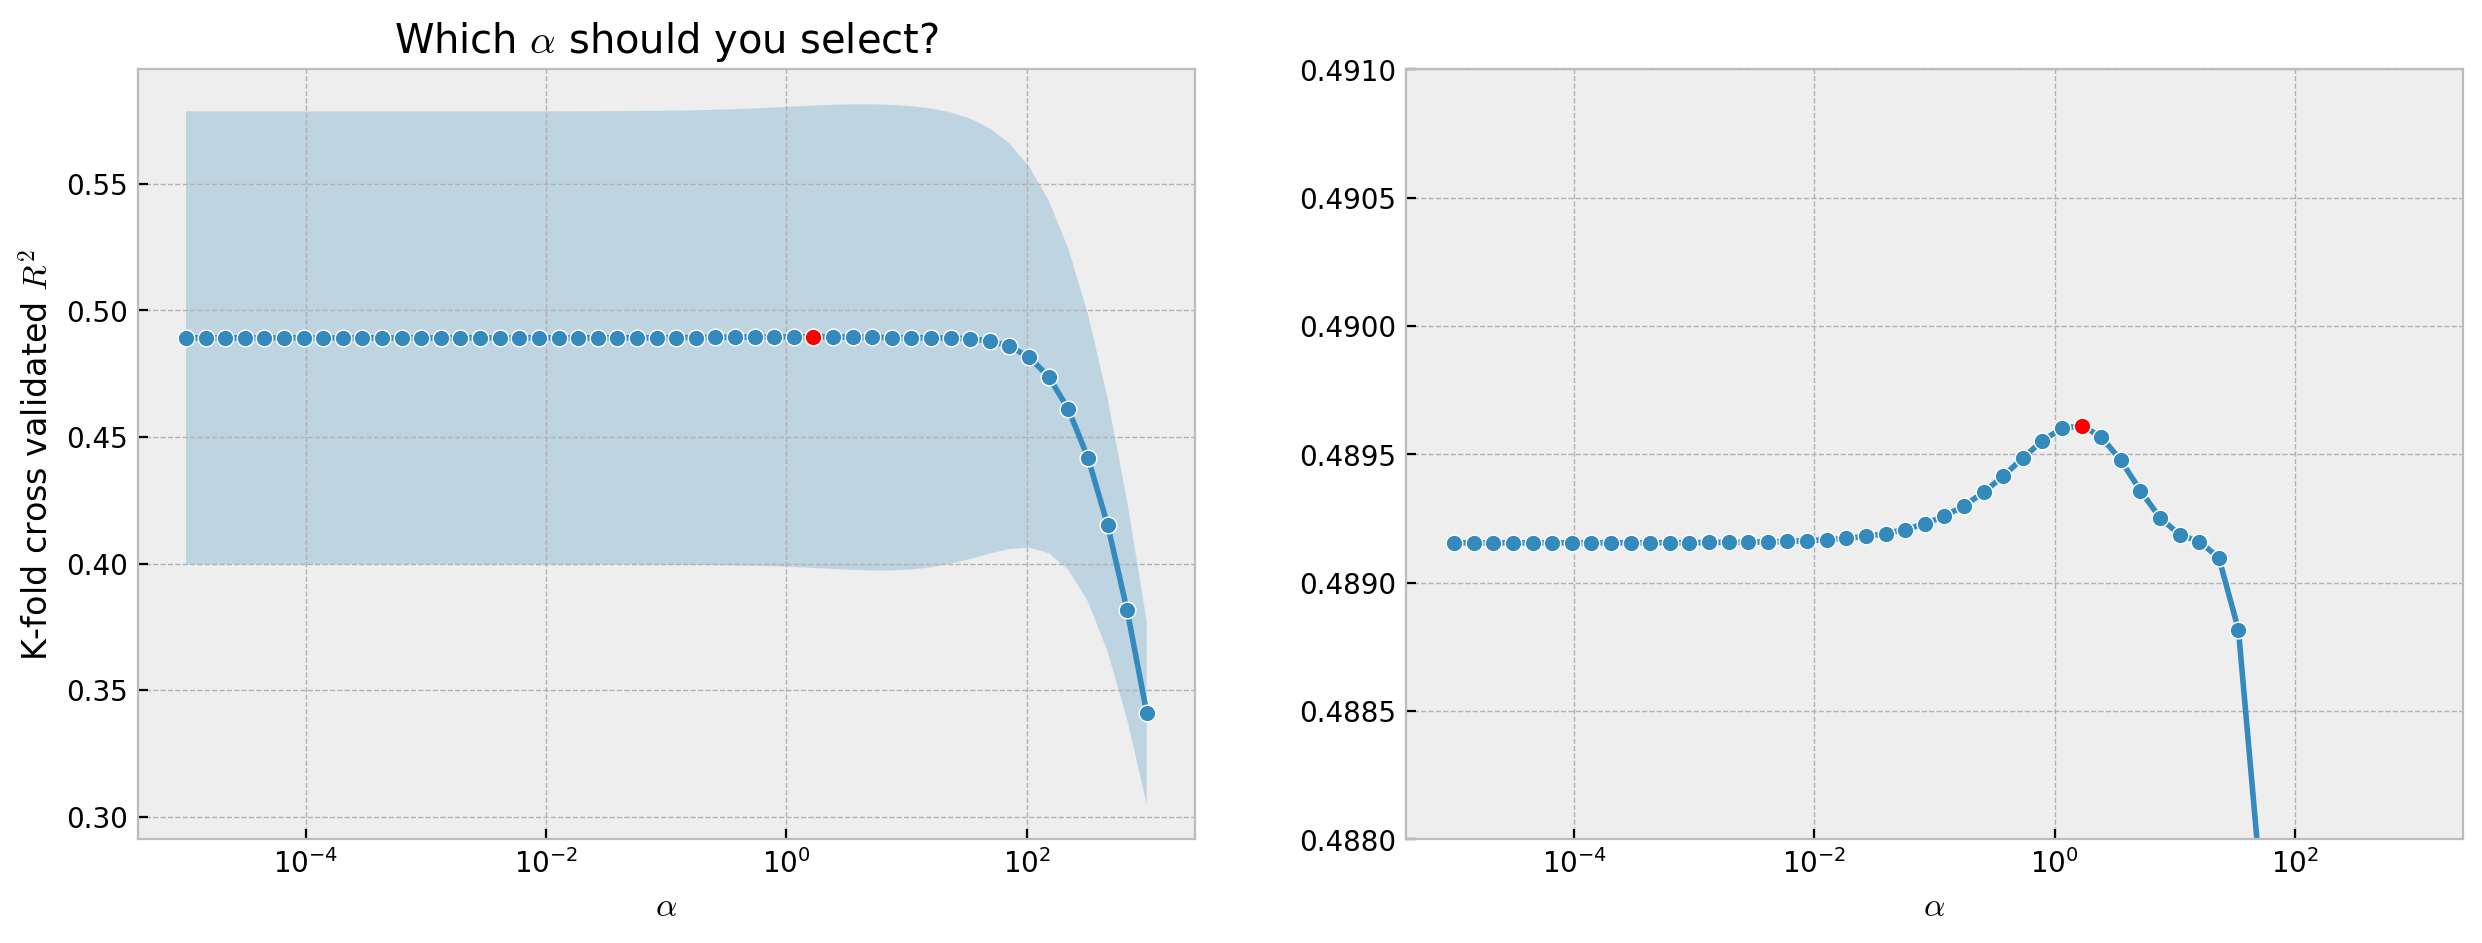

In [36]:
# cross validated score w/ standard deviation envelope
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(best_alpha, cv_score_mean[best_index], 'ro')
plt.fill_between(alphas, cv_score_mean - cv_score_std, cv_score_mean + cv_score_std, alpha=0.25)
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$')
plt.title(r'Which $\alpha$ should you select?')

plt.subplot(122)
plt.plot(alphas, cv_score_mean, 'o-')
plt.plot(best_alpha, cv_score_mean[best_index], 'ro')
plt.ylim([0.488, 0.491])
plt.xscale('log')
plt.xlabel(r'$\alpha$');

From the above plot all $\alpha$ from ~0-80 are all about equally as good.

If that's true, then which $\alpha$ from 0-80 should you choose and why?

The `RidgeCV` class wraps this up for you nice and neat.

In [37]:
from sklearn.linear_model import RidgeCV

# RidgeCV DOES NOT shuffle the data
Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

alphas = np.logspace(-5, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(Xs_shuffled, y_shuffled)

ridge_cv.alpha_

1.6768329368110066

In the above code, try shuffling the data using a different random seed.

Does it make a difference for your selected model?

In [38]:
# RidgeCV defaults to leave one out cross validation where shuffling does not matter
alphas = np.logspace(-5, 3, 50)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(Xs, y)

ridge_cv.alpha_

1.6768329368110066

In [39]:
best_ridge_model = Ridge(alpha=ridge_cv.alpha_)

In [40]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

alphas = np.logspace(-5, 3, 50)

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(Xs, y)

lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(Xs, y)

enet_cv = ElasticNetCV(alphas=alphas)
enet_cv.fit(Xs, y)

ridge_cv.alpha_, lasso_cv.alpha_, enet_cv.alpha_

(1.6768329368110066, 0.08286427728546843, 0.0013257113655901081)

Exhaustive grid search over parameter space for any type of model.

In [41]:
from sklearn.model_selection import GridSearchCV

Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

params = {'alpha': np.logspace(-3, 1.5, 30)}
model = Lasso()
grid_cv = GridSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
grid_cv.fit(Xs_shuffled, y_shuffled)
best_alpha = grid_cv.best_params_['alpha']
best_model = grid_cv.best_estimator_

best_model

Lasso(alpha=0.887719708898587)

In [42]:
# mean cross-validated test score for each alpha
grid_cv.cv_results_['mean_test_score']

array([-2985.24718414, -2985.25203231, -2985.25934192, -2985.27045595,
       -2985.28781758, -2985.31555598, -2985.36120969, -2985.35778074,
       -2985.13779765, -2984.57139512, -2984.2152476 , -2983.7549679 ,
       -2983.4796126 , -2984.08181842, -2987.84428934, -2990.40322899,
       -2986.86681037, -2985.00643763, -2983.205588  , -2981.61750607,
       -2982.2016189 , -2993.55163359, -3015.12317464, -3043.20727059,
       -3101.82534885, -3176.17072677, -3295.24811576, -3530.6297478 ,
       -3932.11464344, -4654.361307  ])

In [43]:
# standard deviation of cross-validated test scores for each alpha
grid_cv.cv_results_['std_test_score']

array([472.49218481, 472.48321027, 472.47049617, 472.45248471,
       472.4271676 , 472.39164308, 472.34245278, 472.21052348,
       471.92853647, 472.00197925, 471.93558442, 471.67287329,
       471.07351551, 469.98704405, 469.06763394, 468.21774207,
       466.13578286, 461.79283883, 454.99405802, 446.07619735,
       434.50029689, 419.09946806, 399.07446576, 377.34176617,
       357.83977031, 354.84219598, 348.99641613, 351.08339267,
       381.37447574, 503.28450874])

Non-exhaustive randomized search across parameter space (much faster when parameter space is huge).

In [44]:
from sklearn.model_selection import RandomizedSearchCV

Xs_shuffled, y_shuffled = shuffle(Xs, y, random_state=0)

params = {'alpha': np.logspace(-3, 1.5, 30000)}
model = Lasso()
rand_cv = RandomizedSearchCV(model, params, cv=10, scoring='neg_mean_squared_error')
rand_cv.fit(Xs_shuffled, y_shuffled)
best_alpha = rand_cv.best_params_['alpha']
best_model = grid_cv.best_estimator_

best_model

Lasso(alpha=0.887719708898587)

# Example revisited

Consider the following task from [Steinmetz et al. (2019)](https://www.nature.com/articles/s41586-019-1787-x): For a repeated series of trials, a mouse is trained to rotate a wheel to indicate whether it perceives a Gabor pattern to the left or right. Spike rates from many cortical neurons are recorded on each trial. The goal is to build a model that can predict the mouse's choice based on the spiking of its cortical neurons.

![](images/gabor.png)

Adapted from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W1D4_GeneralizedLinearModels/student/W1D4_Tutorial2.html)

Load the data:

* `choices`: mouse chooses whether a Gabor stimulus is to the left or right on each of 276 trials 
* `spikes`: normalized spike rates for each of 691 neurons across the cortex recorded with Neuropixel probes on each trial

In [45]:
spikes = np.load('data/mouse_cortical_spiking.npy')
choices = np.load('data/mouse_left_right_choices.npy')

spikes.shape, choices.shape

((276, 691), (276,))

In [46]:
choices[:9]

array([1., 1., 0., 0., 0., 0., 1., 0., 0.])

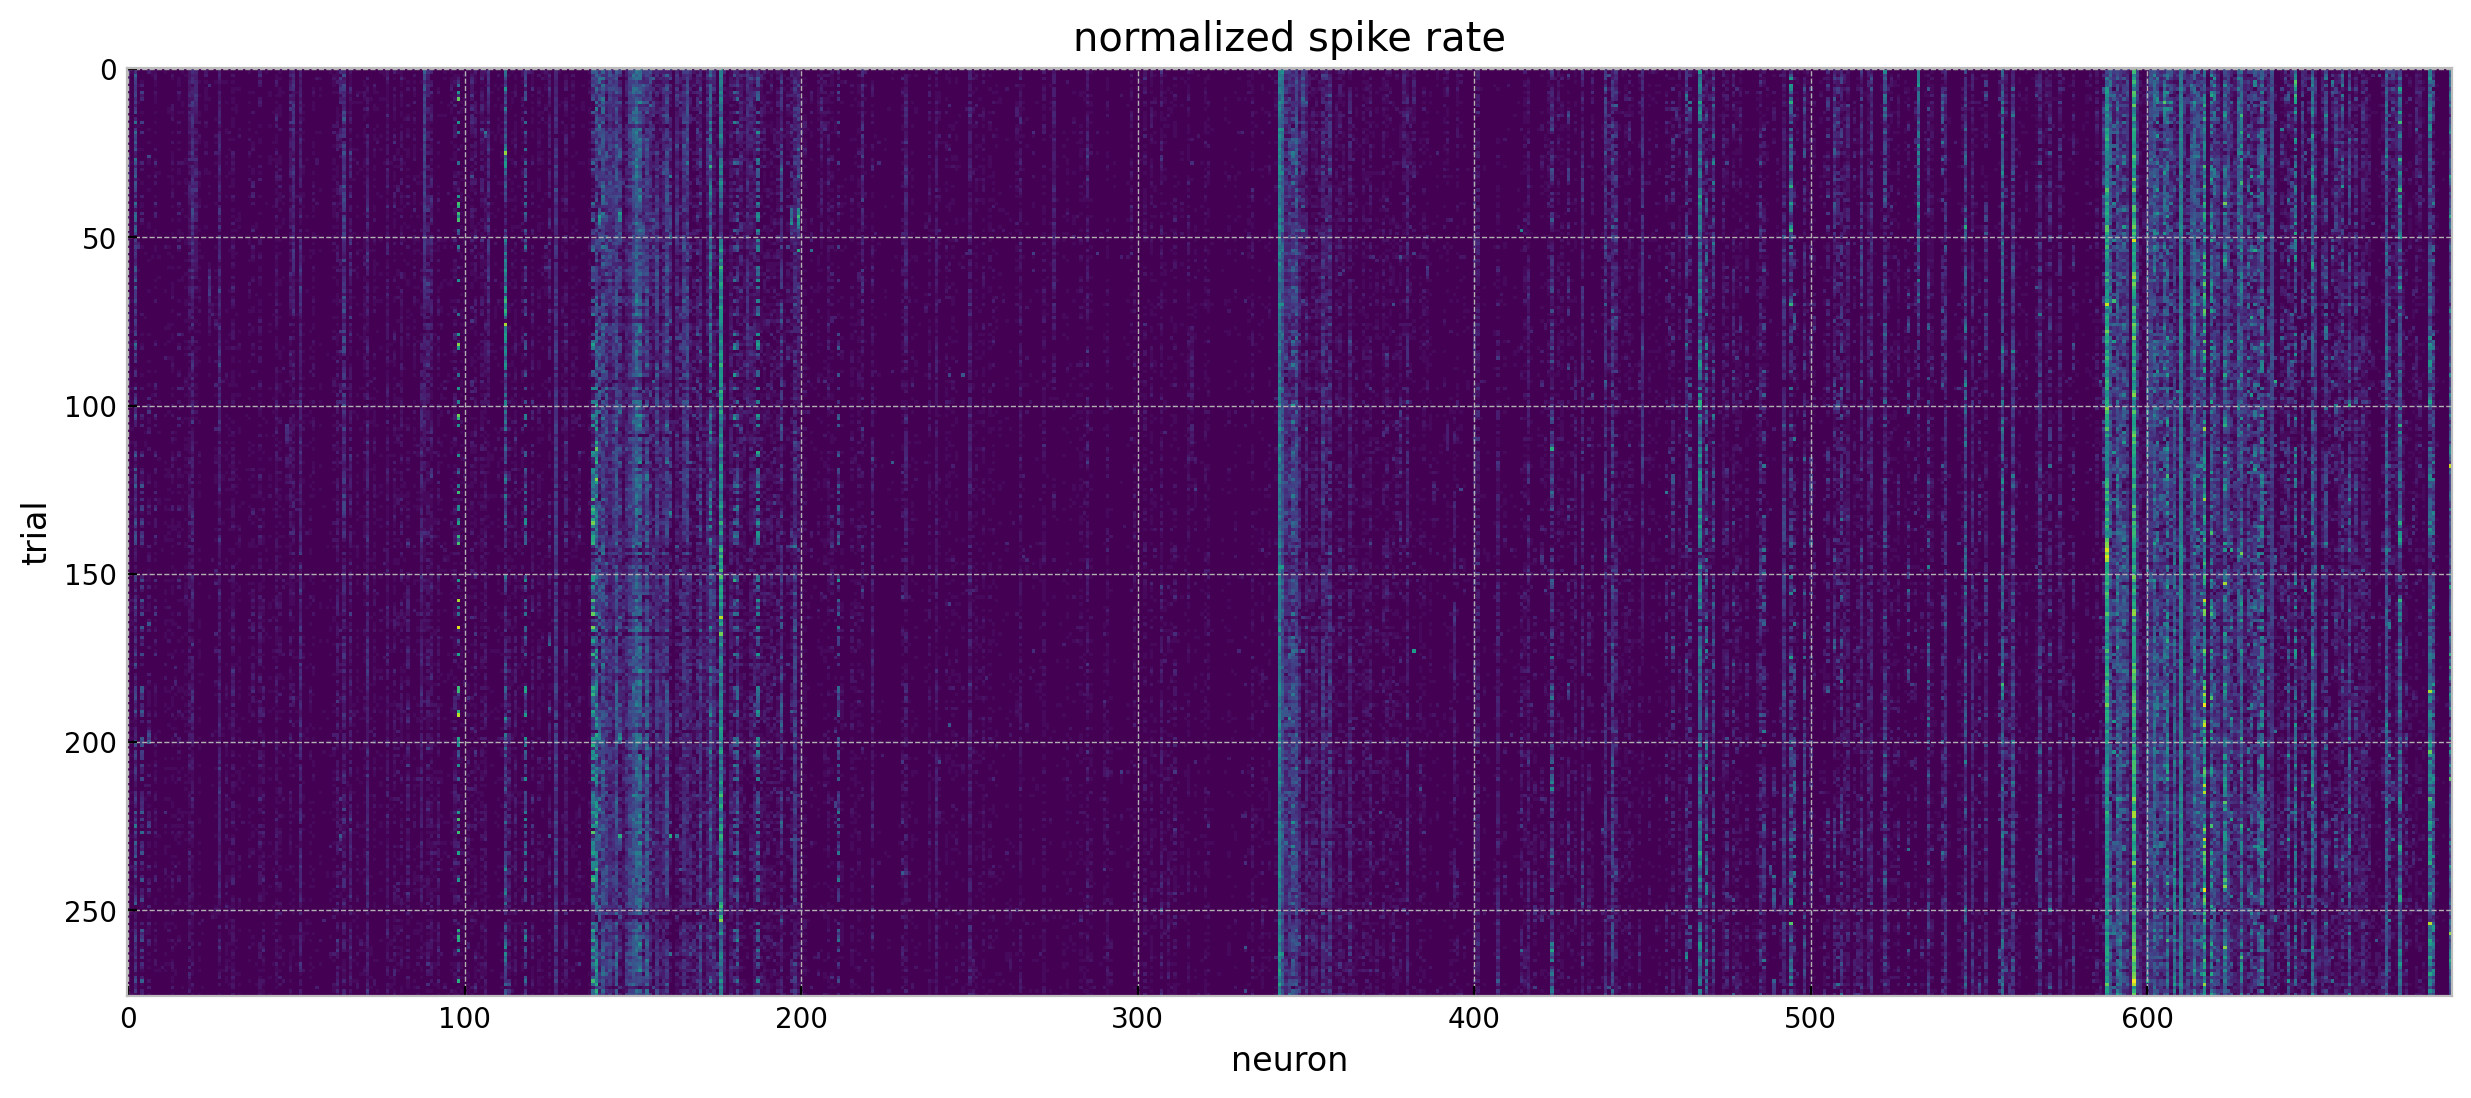

In [47]:
plt.figure(figsize=[15,8])
plt.imshow(spikes)
plt.xlabel('neuron')
plt.ylabel('trial')
plt.title('normalized spike rate');
# plt.colorbar();

Use a logistic regression model to predict the mouse's choice (left or right) based on its cortical activity in each trial.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# cross_val_score DOES NOT shuffle the data by default.
# this is so we can evaluate each model (alpha) on the exact same data partitioning
X, y = shuffle(spikes, choices, random_state=0)

alphas = np.logspace(-3, 3, 30)
K = 5
cv_accuracy = np.zeros([len(alphas), K])

for i, alpha in enumerate(alphas):
    model = LogisticRegression(penalty='l2', C=1/alpha, max_iter=300)
    cv_accuracy[i] = cross_val_score(model, X, y, cv=K, scoring='accuracy')

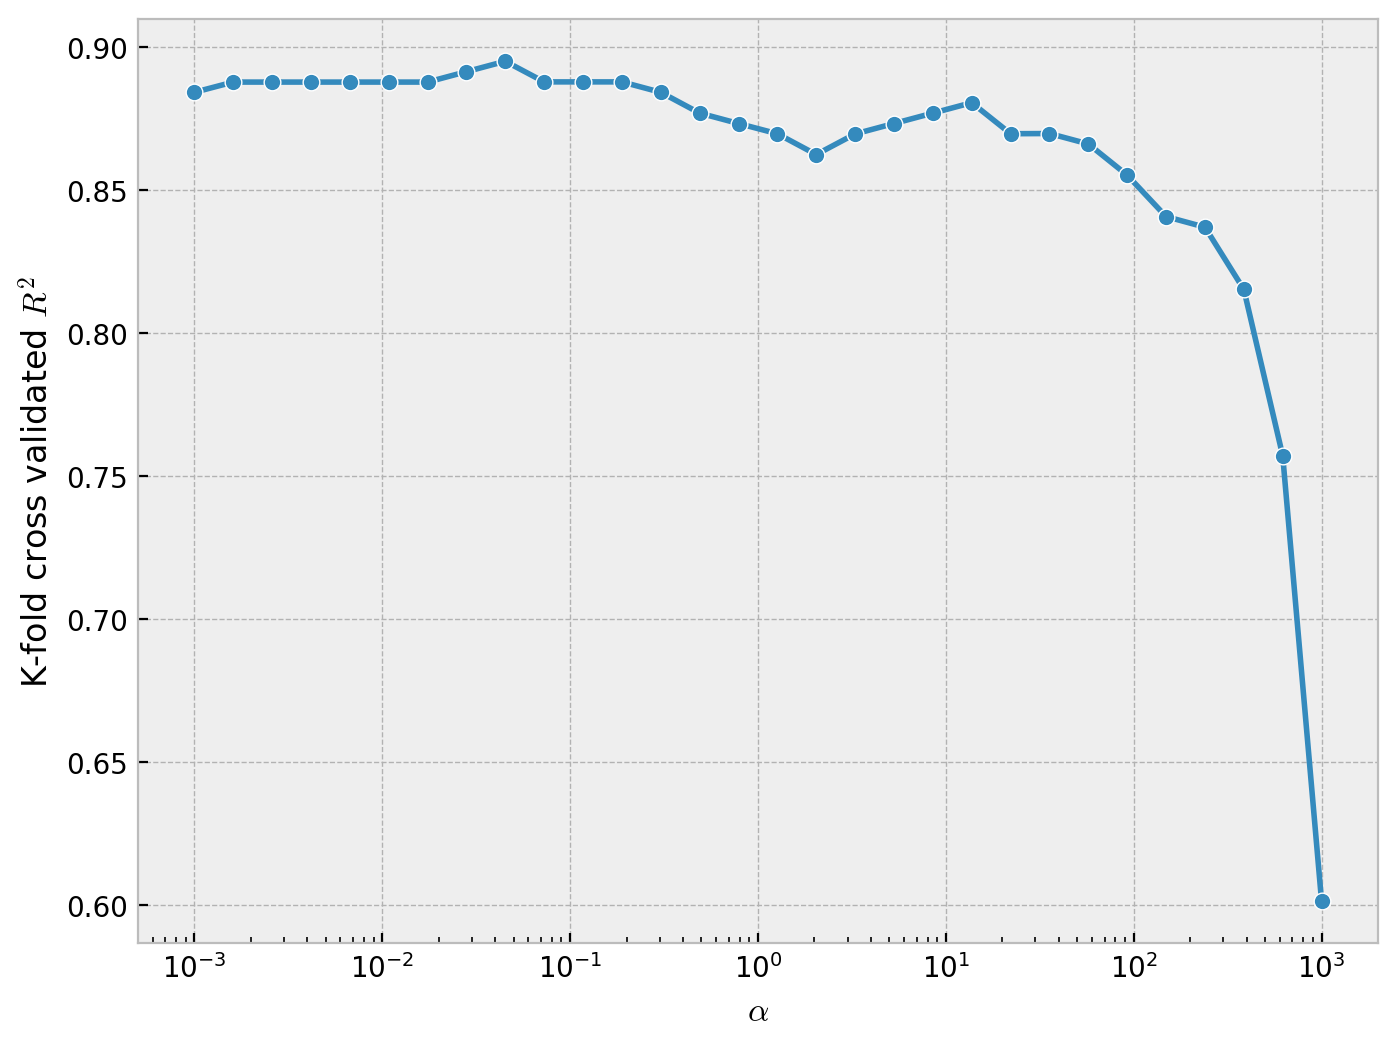

In [49]:
cv_mean_accuracy = cv_accuracy.mean(axis=1)

plt.plot(alphas, cv_mean_accuracy, 'o-')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('K-fold cross validated $R^2$');

# Exercise

For the logistic regression model predicting a mouse's left/right choice above, find the value of $\alpha$ with the best cross validated accuracy. Use this alpha to generate a final logistic regression model using all available data.

In [50]:
best_alpha = ...

best_model = ...

# Exercise Key

For the logistic regression model predicting a mouse's left/right choice above, find the value of $\alpha$ with the best cross validated accuracy. Use this alpha to generate a final logistic regression model using all available data.

In [51]:
best_alpha = alphas[np.argmax(cv_mean_accuracy)]

best_model = LogisticRegression(penalty='l2', C=1/best_alpha, max_iter=300)

# Example revisited

Modeling retinal ganglion spike train by fitting a temporal receptive field.

Poisson GLM spike count prediction based on stimulus history.

Adapted from [Neuromatch Academy](https://neuronline.sfn.org/scientific-research/tutorial-1-generalized-linear-models)

In [52]:
# data from Jonathan Pillow's lab: https://github.com/pillowlab/GLMspiketraintutorial
stimulus = np.load('data/retinal_ganglion_stimulus.npy')
spikes = np.load('data/retinal_ganglion_spikes.npy')

stimulus.shape, spikes.shape

((20000,), (20000,))

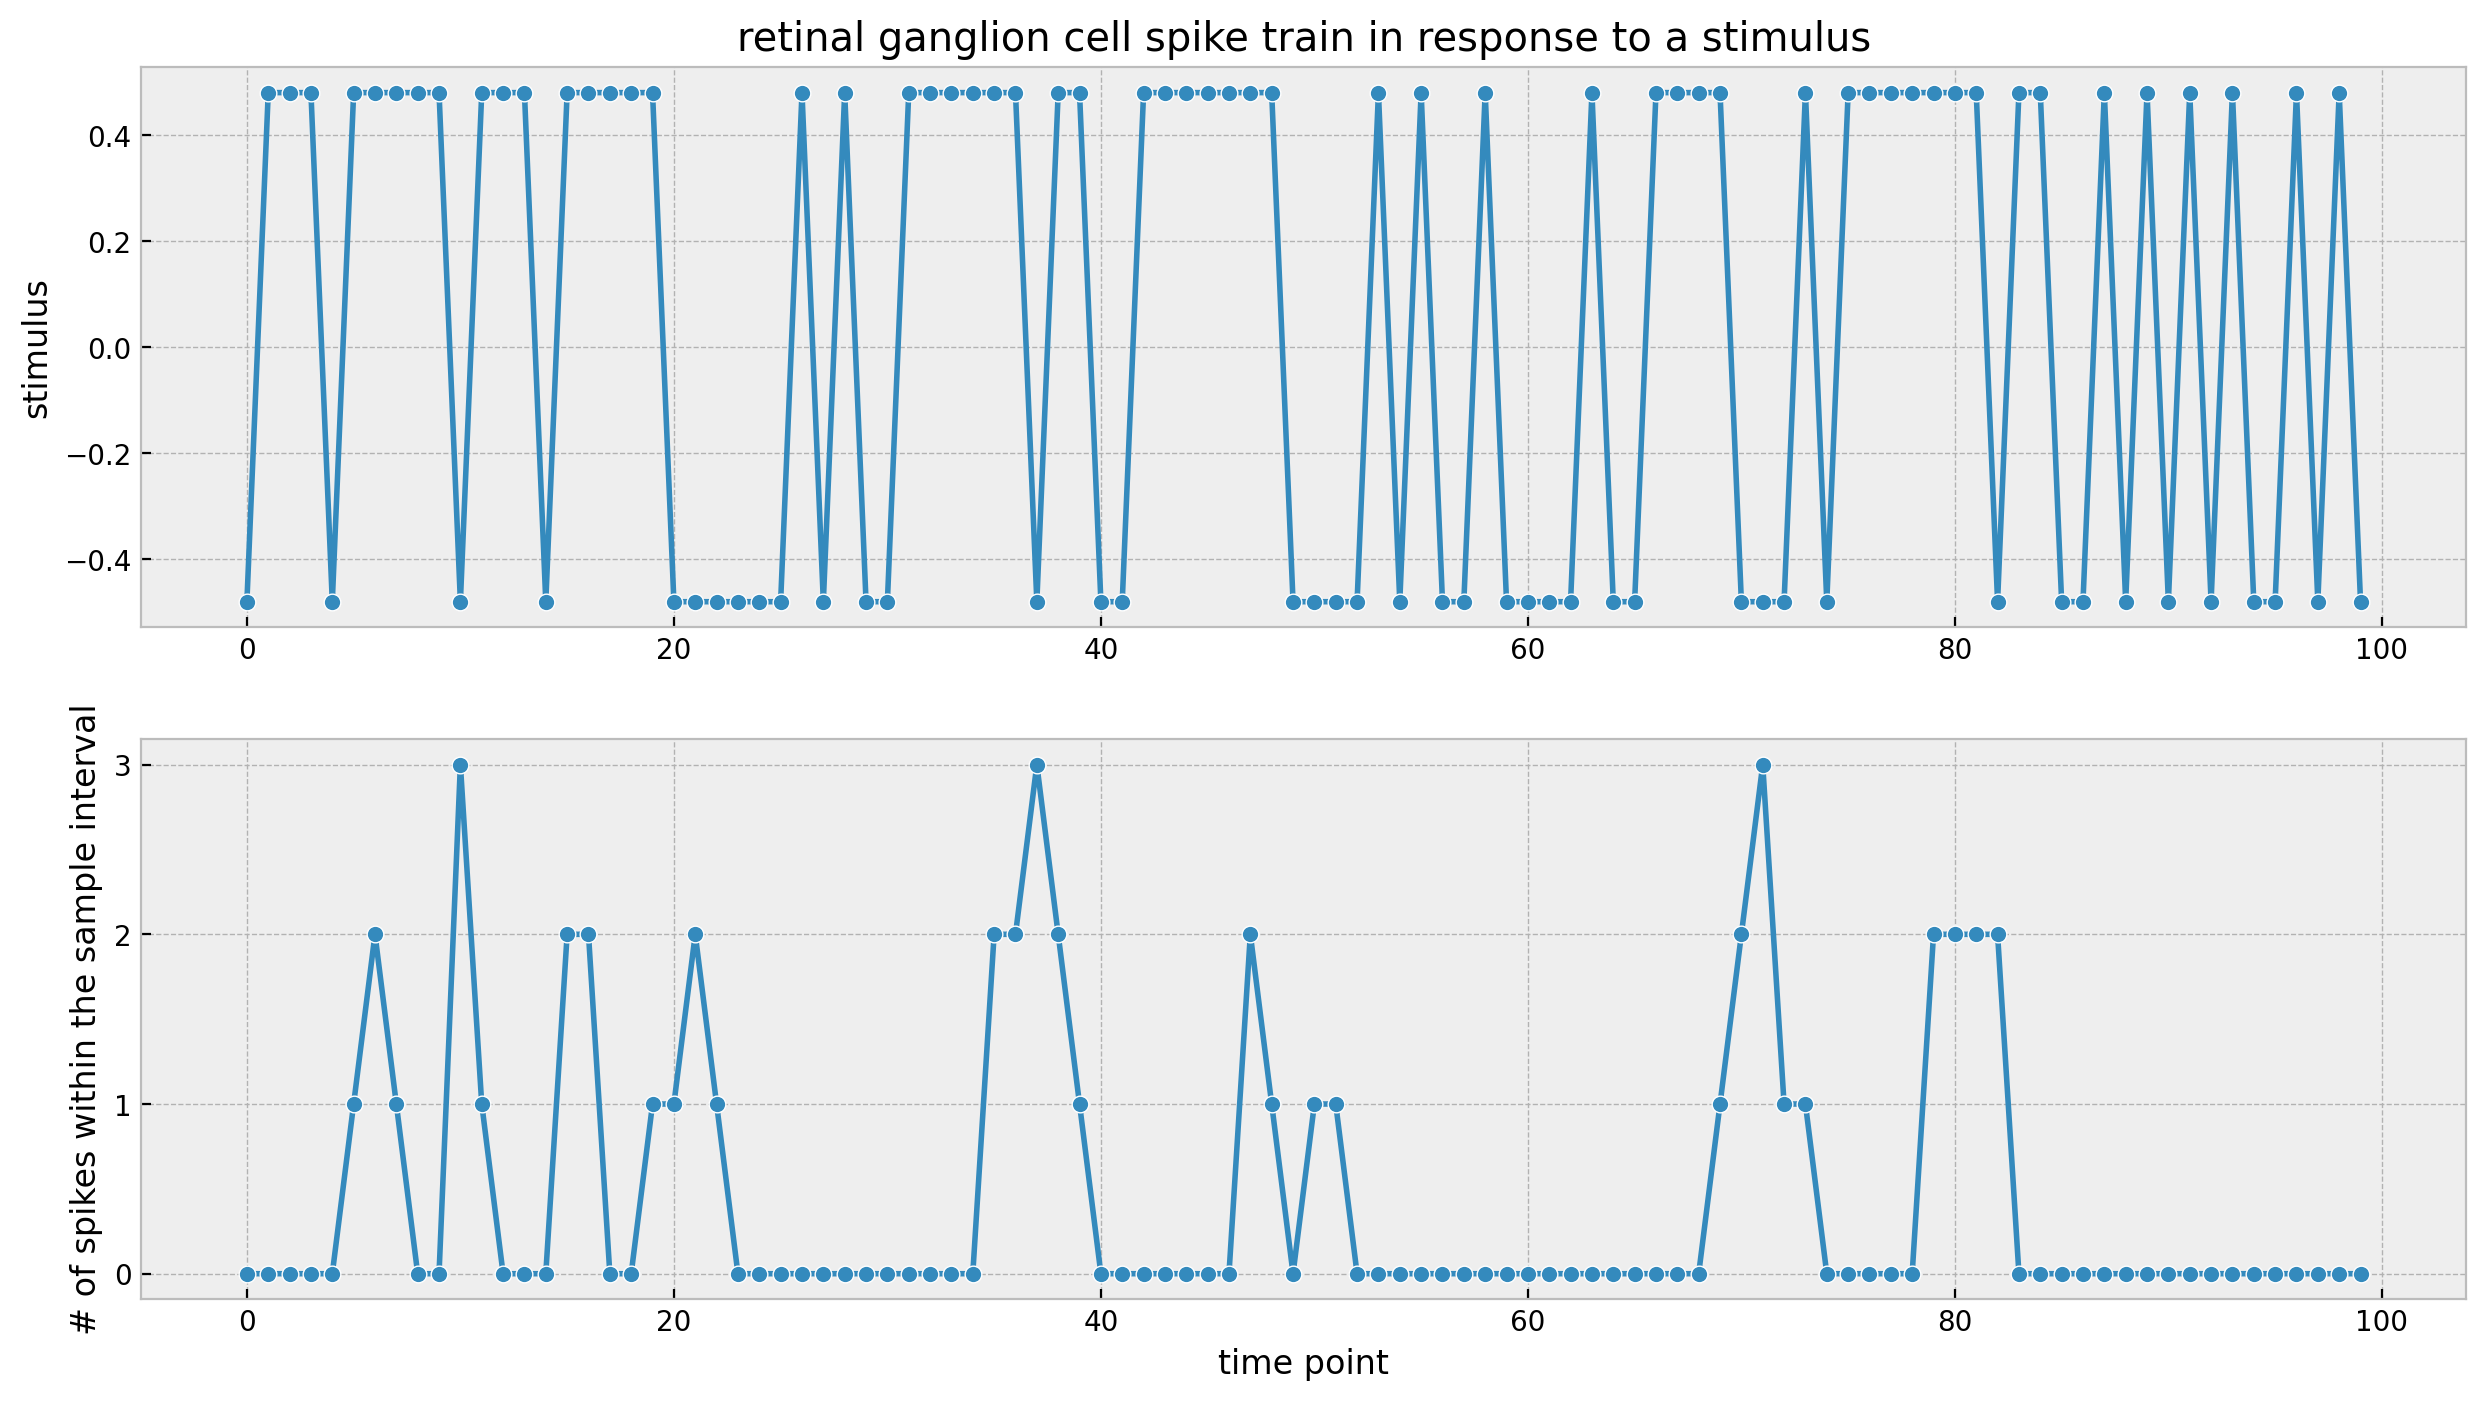

In [53]:
# retinal ganglion stimulus and spike data
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.plot(stimulus[:100], 'o-')
plt.ylabel('stimulus')
plt.title('retinal ganglion cell spike train in response to a stimulus')
plt.subplot(212)
plt.plot(spikes[:100], 'o-')
plt.yticks(range(4))
plt.ylabel('# of spikes within the sample interval')
plt.xlabel('time point');

Features for each time point are the stimulus in the immediately preceeding time window.

In [54]:
def stimulus_to_X(stimulus):
    T = len(stimulus)
    X = np.zeros((T, 25))
    for t in range(T):
        if t < 24:
            X[t,-t-1:] = stimulus[:t+1]  # last t columns of row t
        else:
            X[t,:] = stimulus[t-24:t+1]  # full row t
    return X

X = stimulus_to_X(stimulus)
y = spikes

In [55]:
from sklearn.linear_model import PoissonRegressor

model = PoissonRegressor(alpha=0)

# fit the model to the data X, y
model.fit(X, y)

# predict the spike counts based on the stimulus
poisson_spikes = model.predict(X)

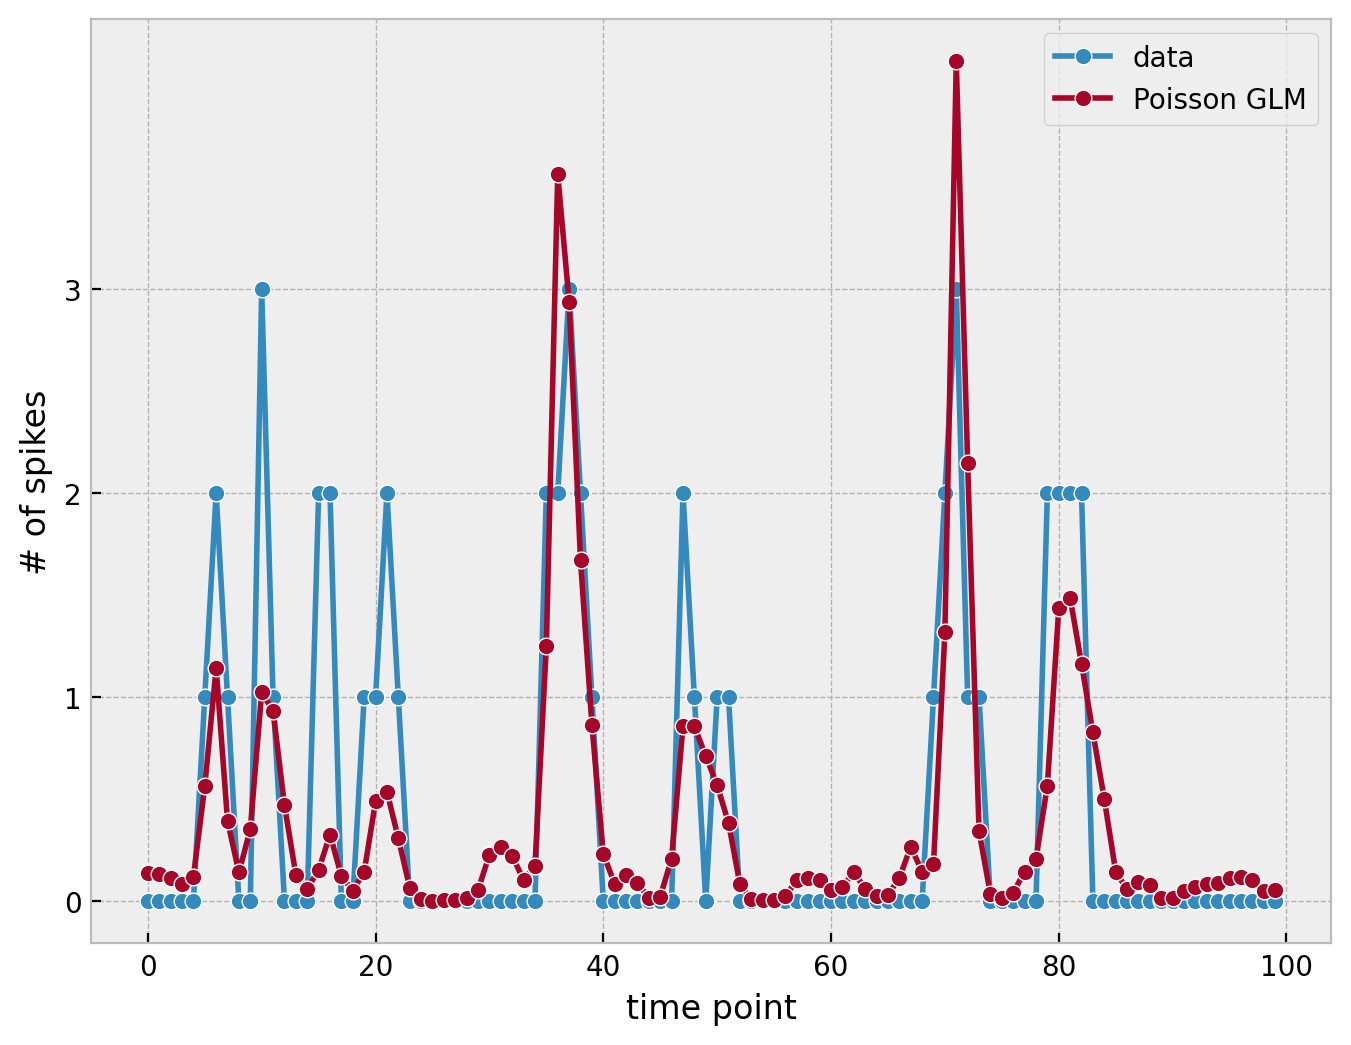

In [56]:
# poisson GLM spike count prediction
plt.plot(spikes[:100], 'o-', label='data')
plt.plot(poisson_spikes[:100], 'o-', label='Poisson GLM')
plt.yticks(range(4))
plt.xlabel('time point')
plt.ylabel('# of spikes')
plt.legend();

But what $\alpha$ should we use to regularize the Poisson GLM model?

[PoissonRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)

In [57]:
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)

alphas = np.logspace(-5, 2, 50)
params = {'alpha': alphas}
model = PoissonRegressor()
grid_cv = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_shuffled, y_shuffled)
alpha = grid_cv.best_params_['alpha']

final_model = PoissonRegressor(alpha=alpha)

final_model

PoissonRegressor(alpha=0.013894954943731374)

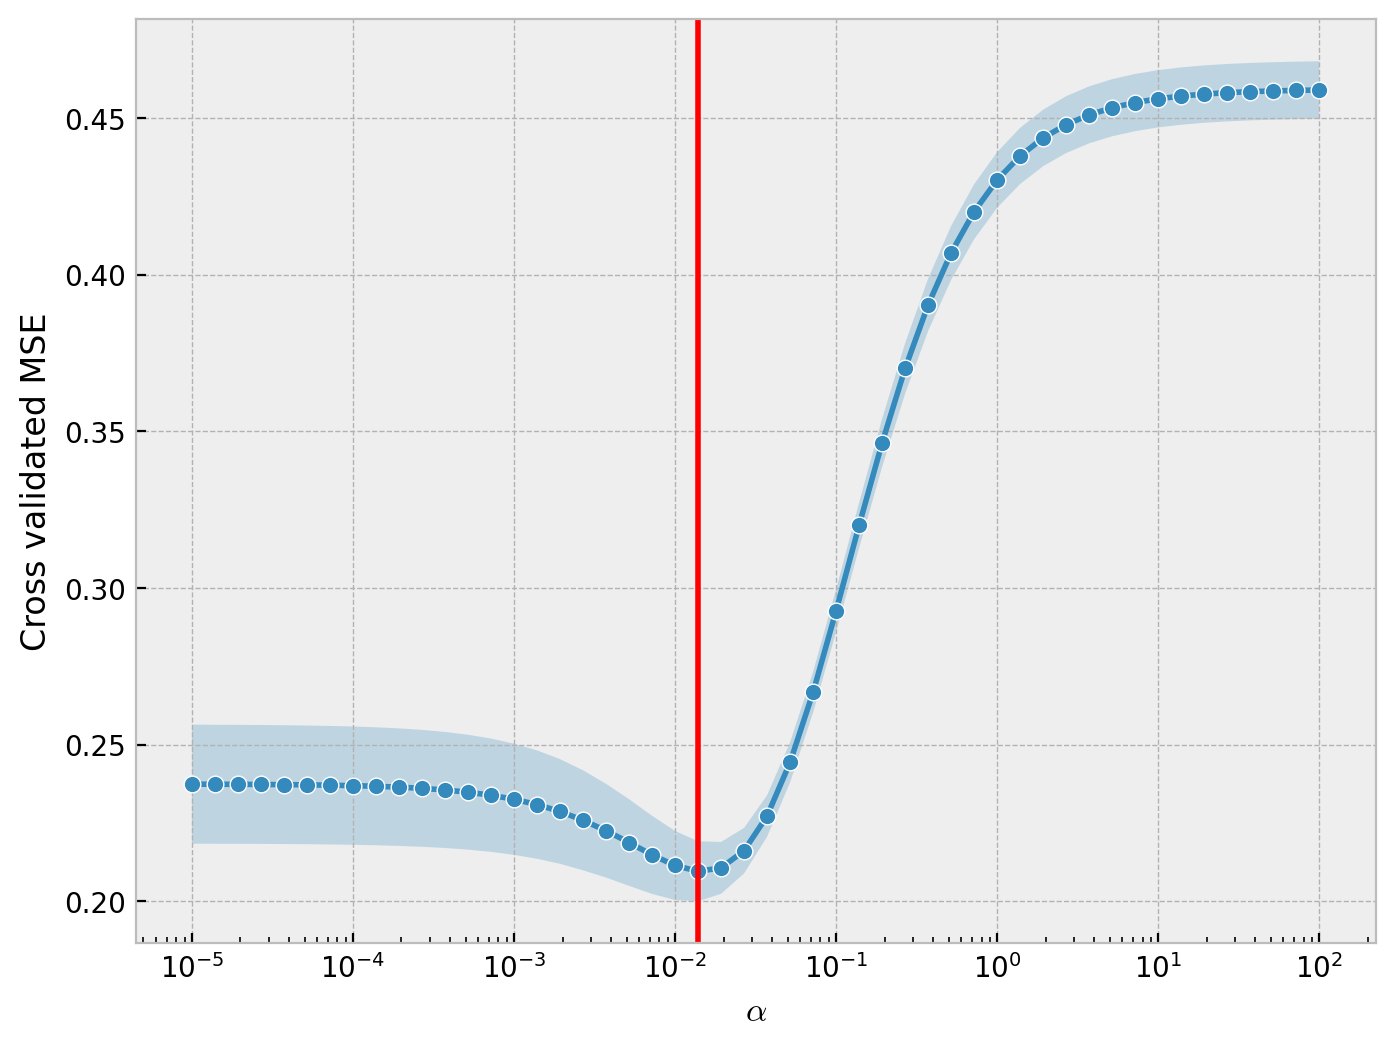

In [58]:
mse_mean = -grid_cv.cv_results_['mean_test_score']
mse_std = grid_cv.cv_results_['std_test_score']

plt.plot(alphas, mse_mean, 'o-')
plt.fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, alpha=0.25)
plt.axvline(alpha, color='r')
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Cross validated MSE');

### Learning goals - *Tuning the regularization hyperparameter*
|  |  |  |
|--|--|--|
| <img src="images/thinking-icon.png"> | <div class="alert alert-info">You understand how to choose the regularization hyperparameter.</div> | `cross-validation` |